In [1]:
from world import PDDLWorld
import os
from colour_dict import colour_names


In [35]:
from util import create_experiment
create_experiment('tworules_perfect_colour_vis', {'scenario_suite':'tworules', 'agent':'agents.PerfectColoursAgent', 'visualise':'True'})

In [4]:
from experiment import add_experiment
add_experiment('tworules_perfect_colour', None)

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem1.pddl
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem1.pddl


T: No, now you cannot put b1 in the tower because you must put green blocks on yellow blocks
rule priors[0.5 0.5]
object priors: (1.0, 0.0, 0.0)
predictions: (0.0, 1.0)
('(forall (?x) (or (not (green ?x)) (exists (?y) (and (yellow ?y) (on ?x ?y)))))', '(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))')
(and (forall (?x) (in-tower ?x)) (forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y))))))


problem1.pddl reward: -12
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem10.pddl


T: No, now you cannot put b4 in the tower because you must put red blocks on blue blocks
rule priors[0.5 0.5]
object priors: (0.0, 1.0, 1.0)
predictions: (1.0, 0.0)
('(forall (?x) (or (not (green ?x)) (exists (?y) (and (yellow ?y) (on ?x ?y)))))', '(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))')
('(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))', '(forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y)))))')
[<pythonpddl.pddl.Formula object at 0x7f17d79110f0>, <pythonpddl.pddl.Formula object at 0x7f17d7a1d668>]
(and (forall (?x) (in-tower ?x)) (forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y))))) (forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y))))))


problem10.pddl reward: -12
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem11.pddl
problem11.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem12.pddl
problem12.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem13.pddl
problem13.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem14.pddl
problem14.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem15.pddl
problem15.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem16.pddl
problem16.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem17.pddl
problem17.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem18.pddl
problem18.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem19.pddl
problem19.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/probl

Solved: The state satifies the goal

In [2]:
from experiment import add_experiment, run_experiment
from experiment_tracking import read_experiments, get_results_file, get_baseline, load_experiments
from evaluation import test_colour_model, colour_probs, colour_dict, name_to_rgb
from util import add_config_option

In [13]:
df = read_experiments()
df

,config_name,experiment_file,neural_config,status
index,,,,
0,None,None,None,None
1,simple_neural,results/simplecolours/agents.NeuralCorrectingA...,DEFAULT,done
2,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,adam_lr:0.1,done
3,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,adam_lr:1,done
4,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,nesterov_lr:0.1mom:0,done
5,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,nesterov_lr:0.1mom:0.4,done
6,tworules,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done
7,tworules_no_update,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done
8,tworules,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done


In [31]:
rf = get_results_file(df, 15)
perfect_agent = rf.load_agent()

In [34]:
perfect_agent.goal.asPDDL()

'(and (forall (?x) (in-tower ?x)) (forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y))))) (forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y))))))'

In [37]:
perfect_agent.update_goal()
perfect_agent.goal.asPDDL()

'(and (forall (?x) (in-tower ?x)) (forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y))))) (forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y))))))'

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem1.pddl
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem1.pddl


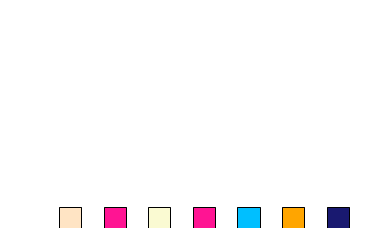

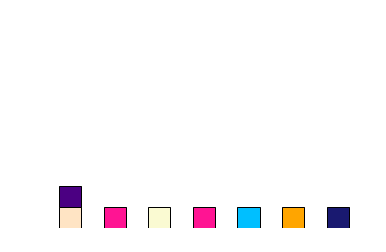

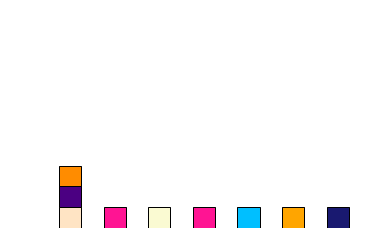

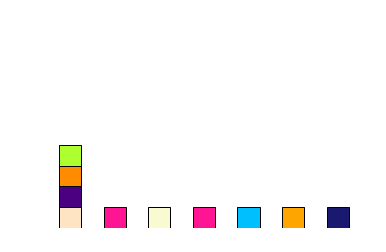

T: No, now you cannot put b1 in the tower because you must put green blocks on yellow blocks
rule priors[0.5 0.5]
object priors: (1.0, 0.0, 0.0)
predictions: (0.0, 1.0)
('(forall (?x) (or (not (green ?x)) (exists (?y) (and (yellow ?y) (on ?x ?y)))))', '(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))')
(and (forall (?x) (in-tower ?x)) (forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y))))))


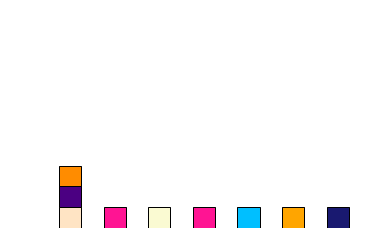

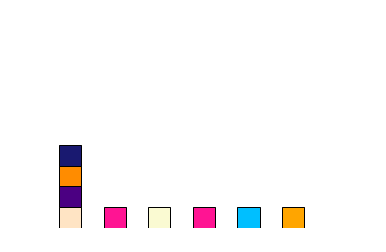

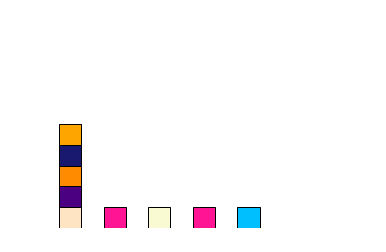

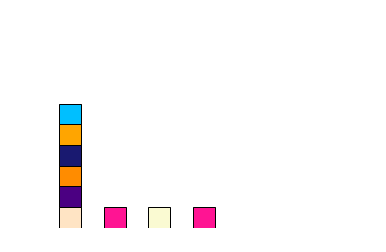

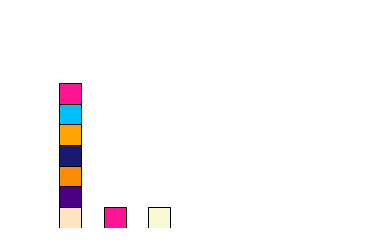

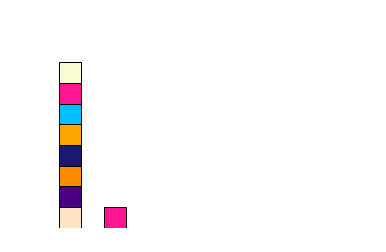

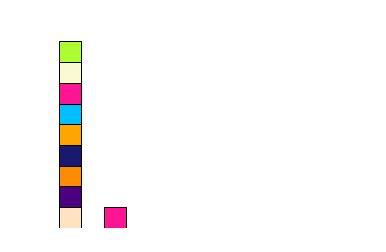

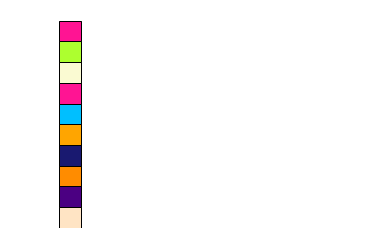

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
problem1.pddl reward: -12
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem10.pddl


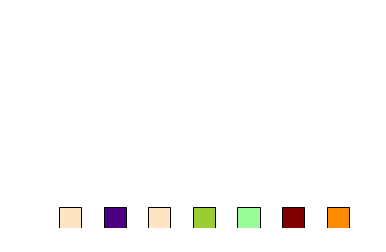

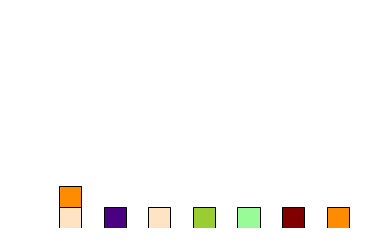

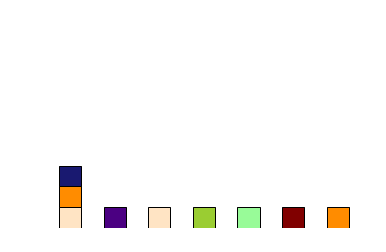

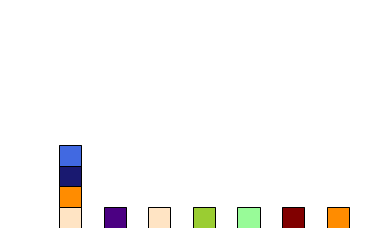

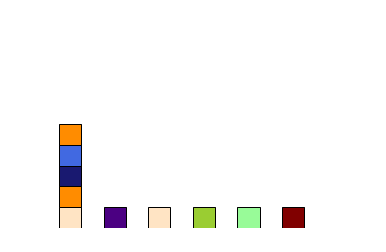

T: No, now you cannot put b4 in the tower because you must put red blocks on blue blocks
rule priors[0.5 0.5]
object priors: (0.0, 1.0, 1.0)
predictions: (1.0, 0.0)
('(forall (?x) (or (not (green ?x)) (exists (?y) (and (yellow ?y) (on ?x ?y)))))', '(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))')
('(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))', '(forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y)))))')
[<pythonpddl.pddl.Formula object at 0x7f17d7df47f0>, <pythonpddl.pddl.Formula object at 0x7f17d7b71470>]
(and (forall (?x) (in-tower ?x)) (forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y))))) (forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y))))))


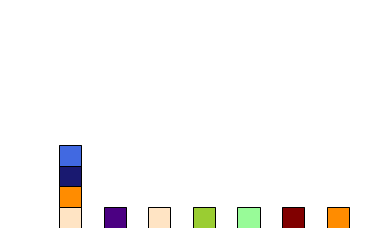

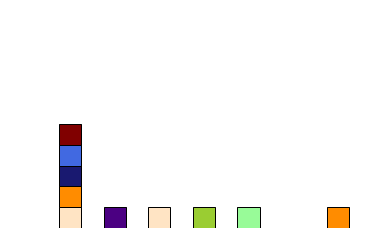

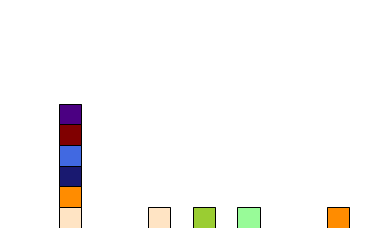

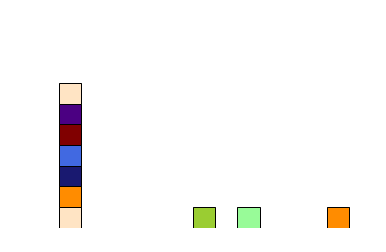

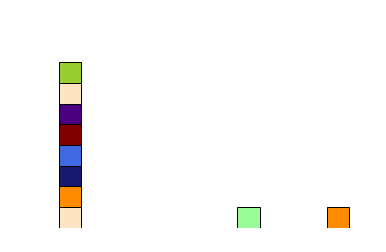

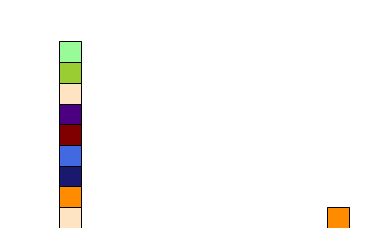

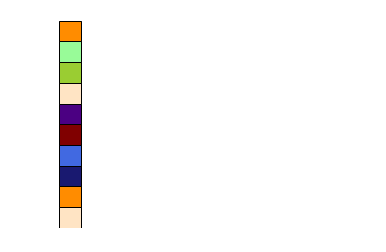

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem10.pddl reward: -12
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem11.pddl


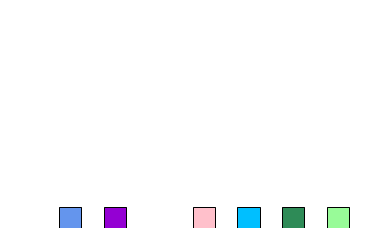

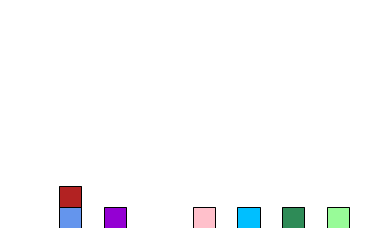

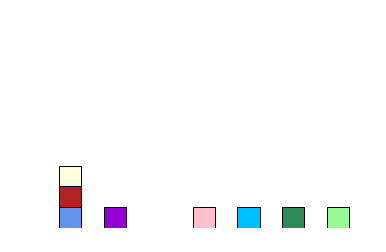

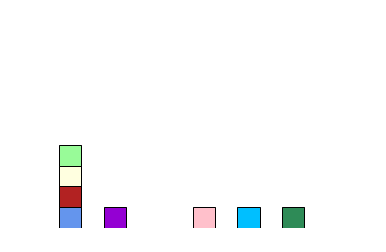

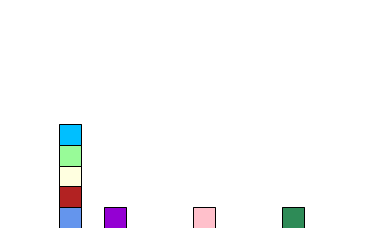

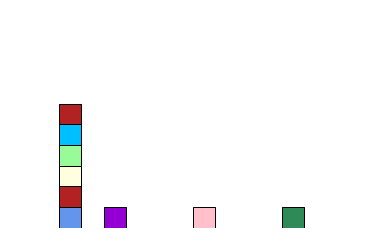

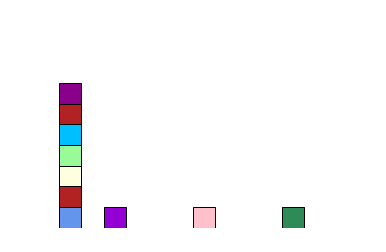

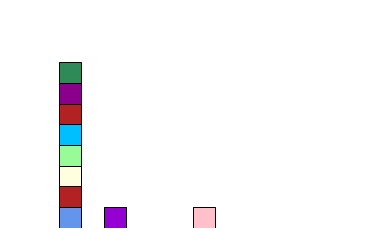

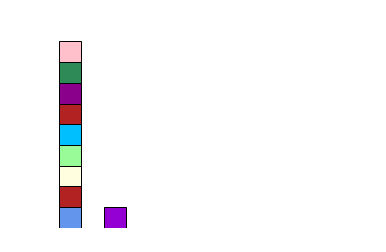

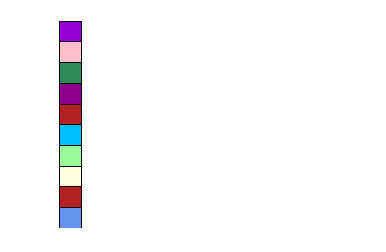

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem11.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem12.pddl


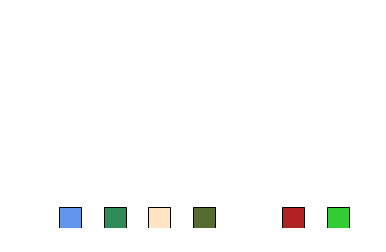

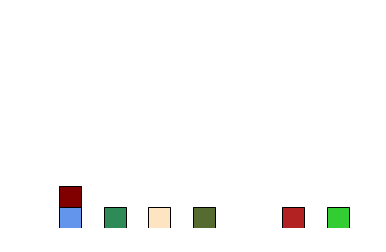

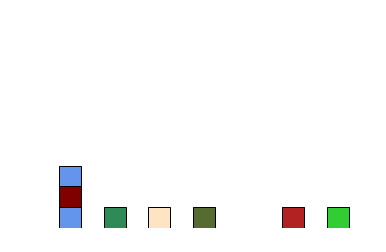

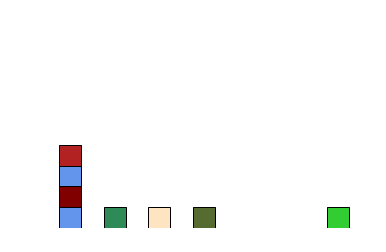

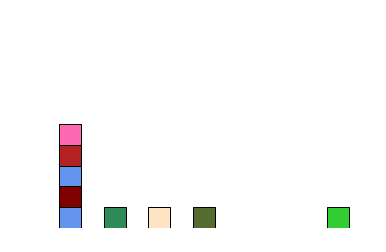

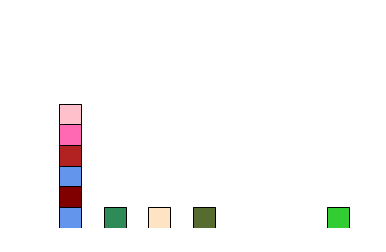

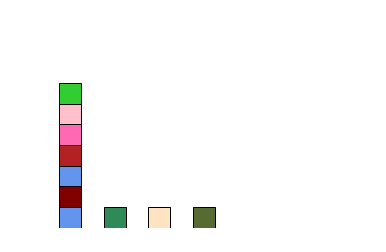

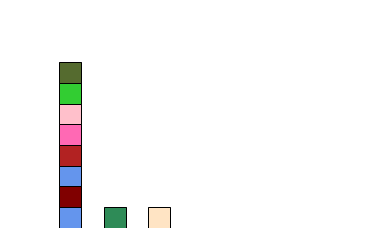

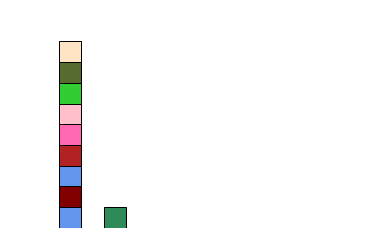

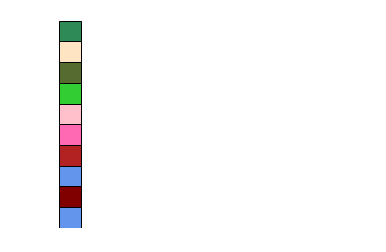

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem12.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem13.pddl


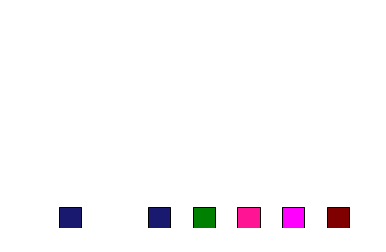

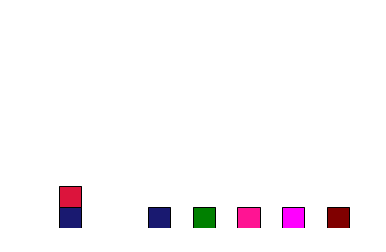

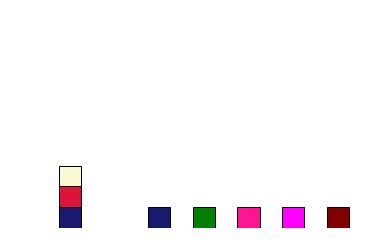

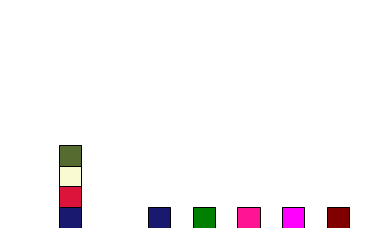

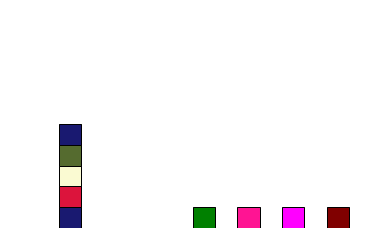

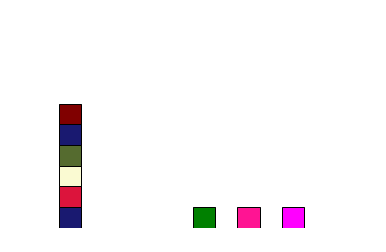

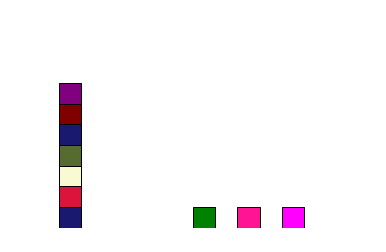

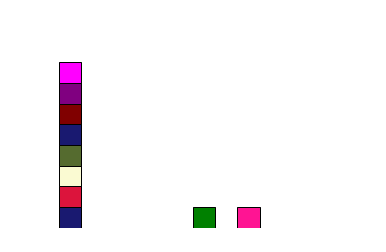

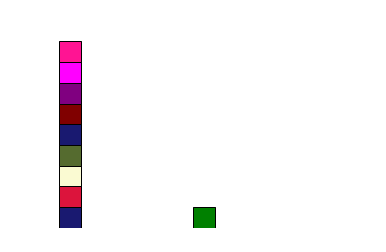

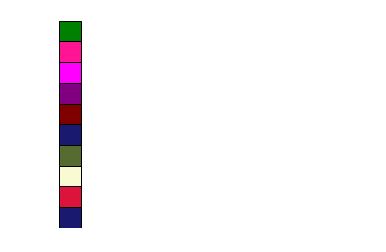

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem13.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem14.pddl


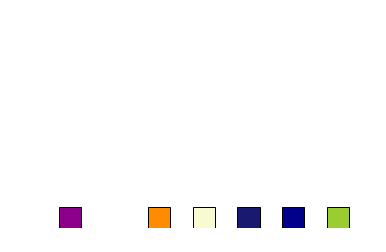

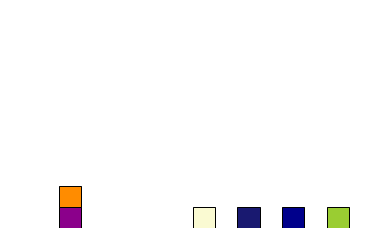

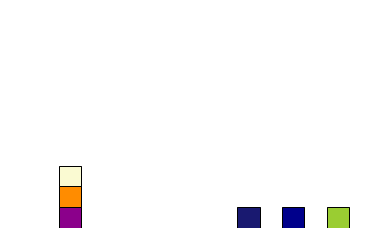

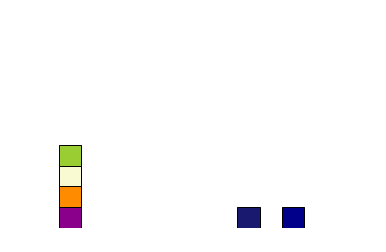

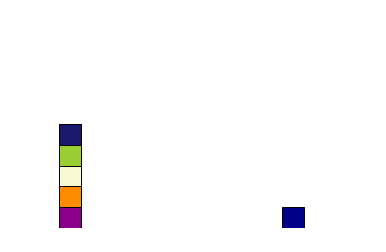

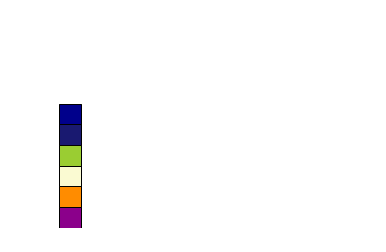

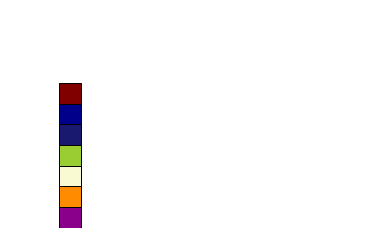

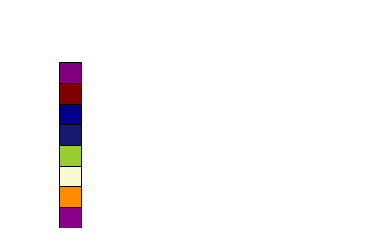

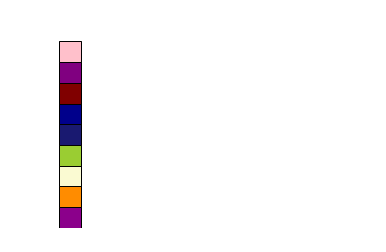

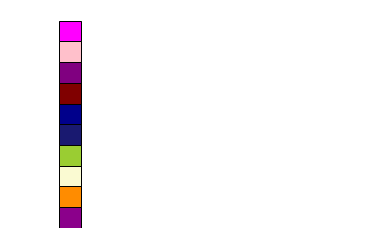

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem14.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem15.pddl


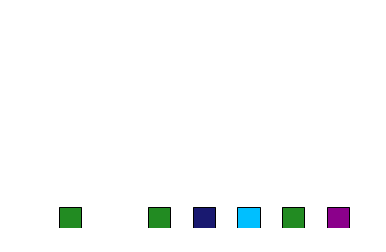

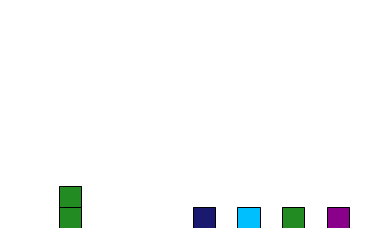

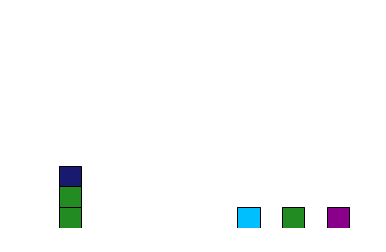

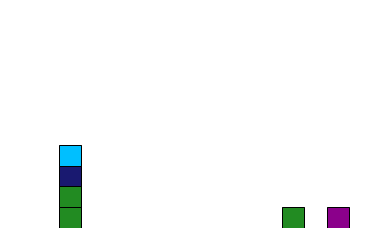

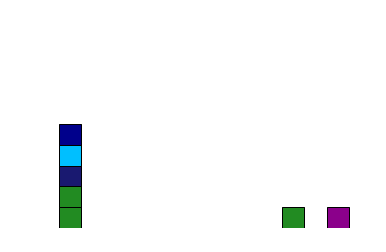

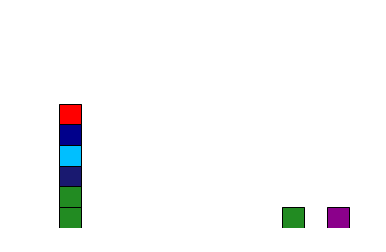

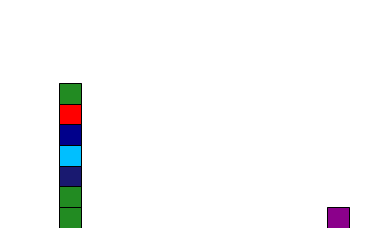

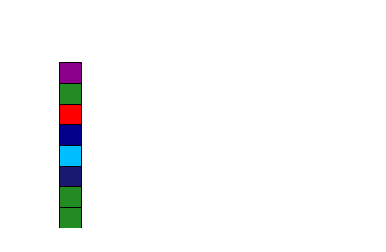

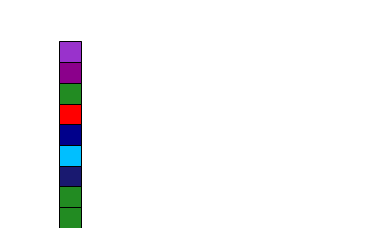

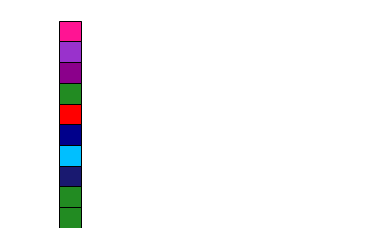

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem15.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem16.pddl


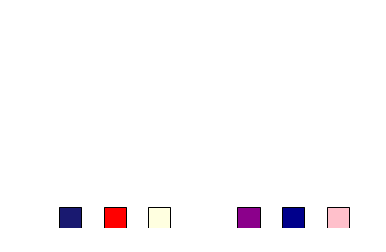

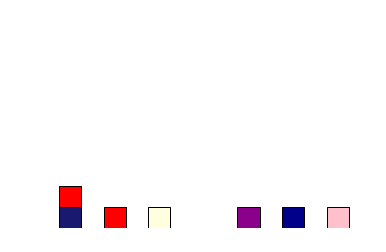

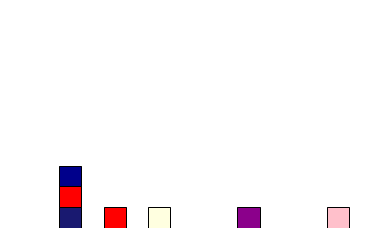

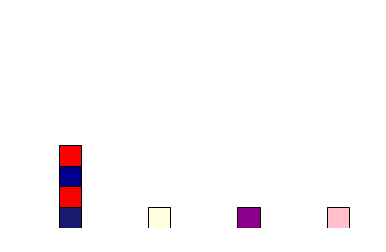

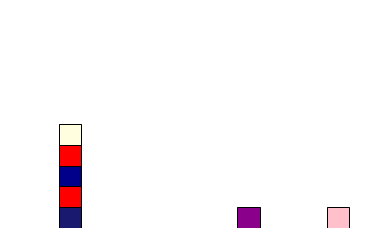

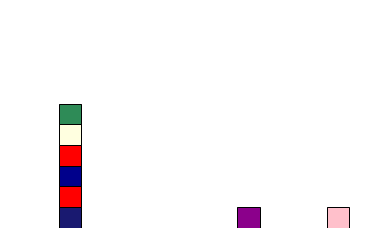

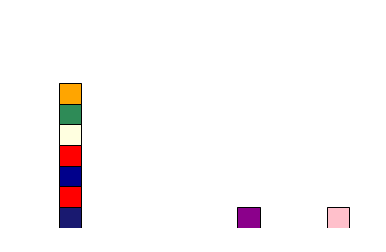

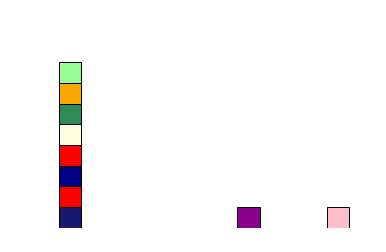

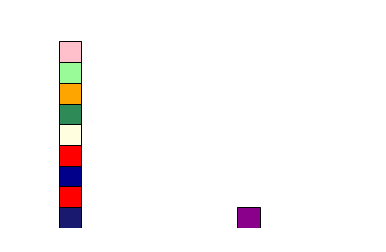

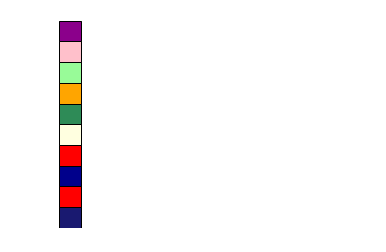

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem16.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem17.pddl


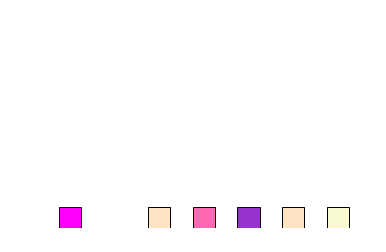

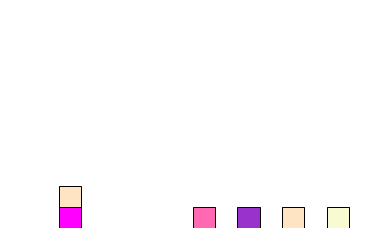

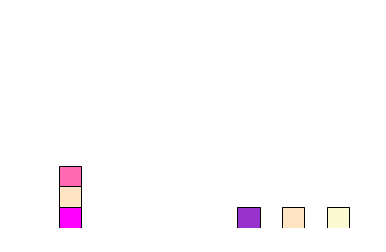

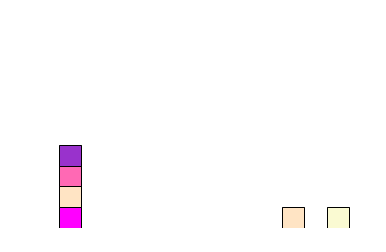

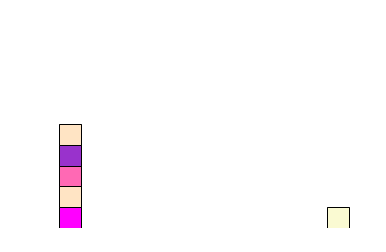

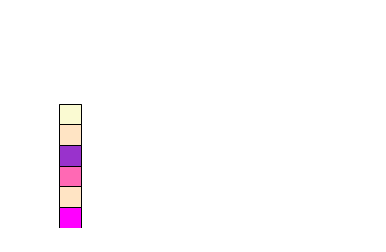

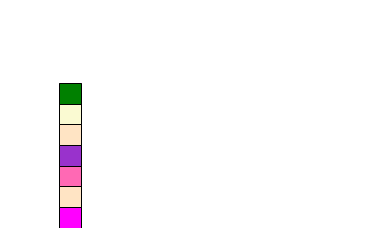

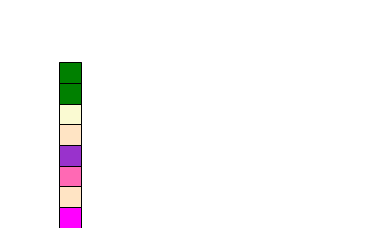

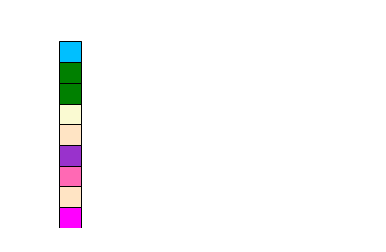

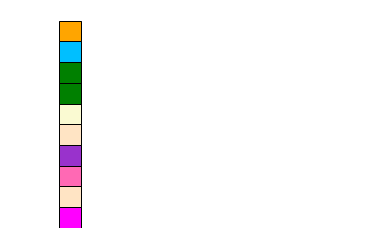

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem17.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem18.pddl


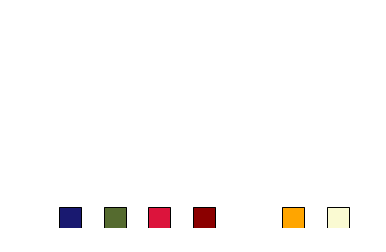

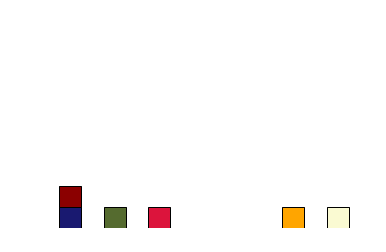

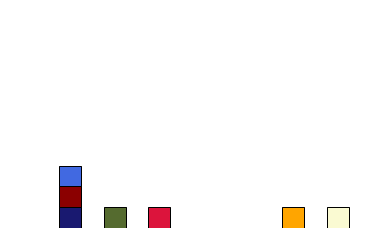

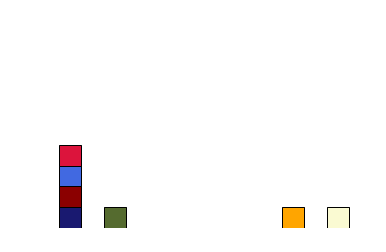

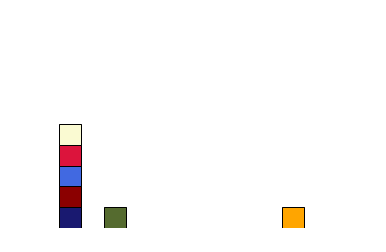

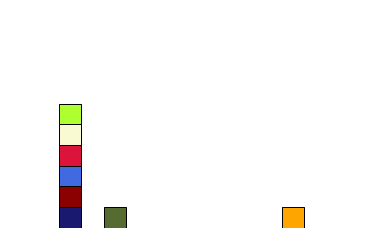

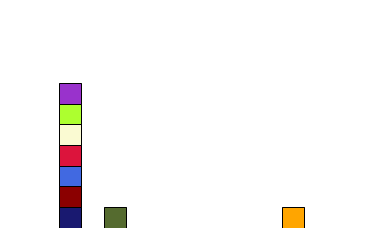

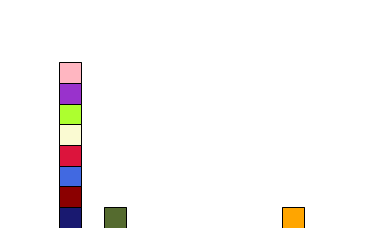

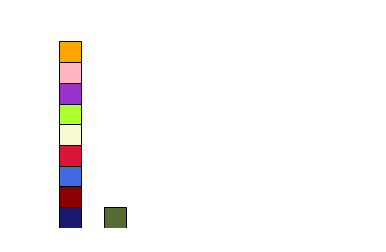

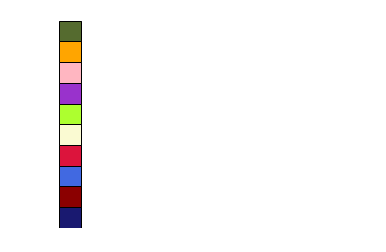

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem18.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem19.pddl


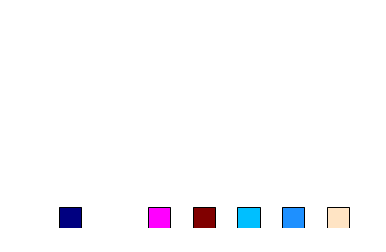

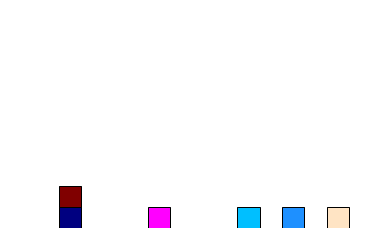

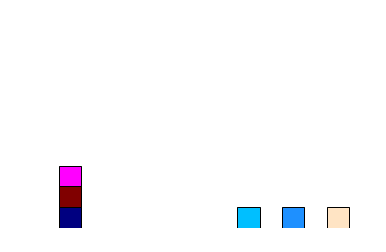

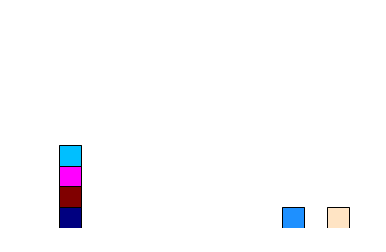

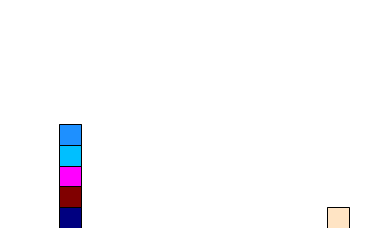

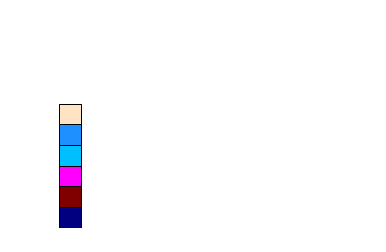

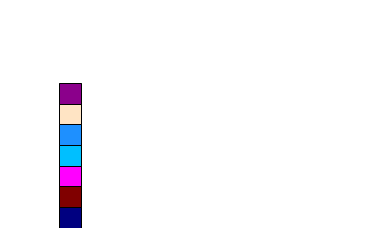

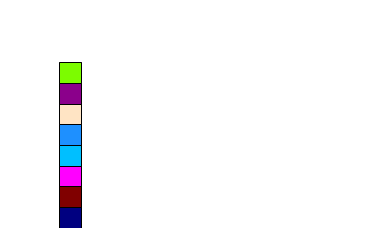

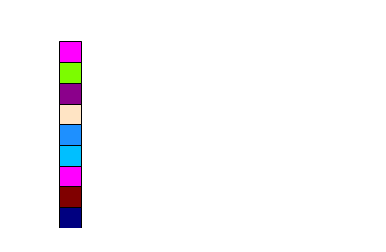

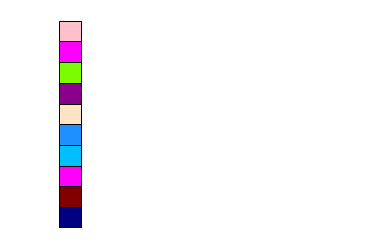

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem19.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem2.pddl


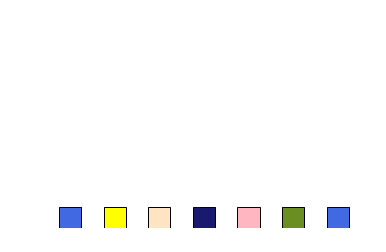

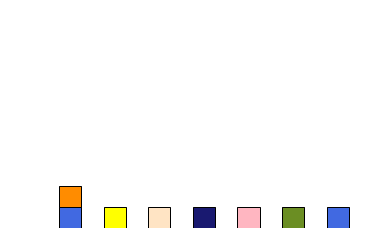

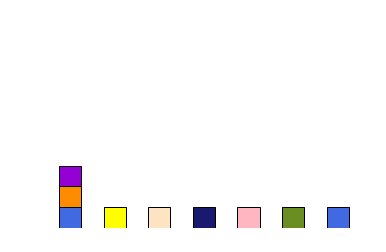

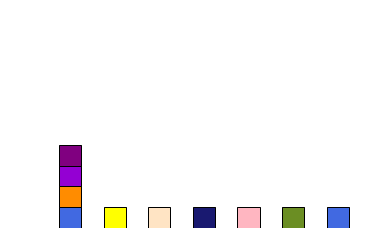

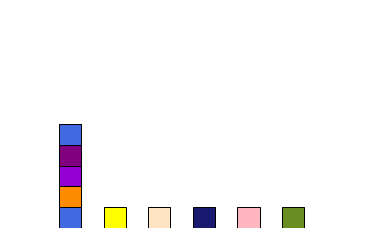

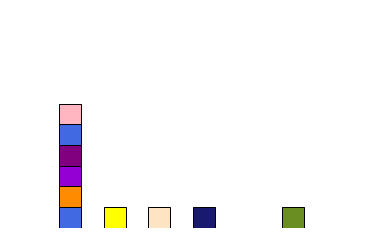

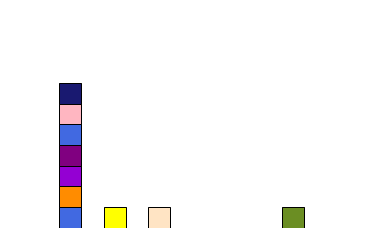

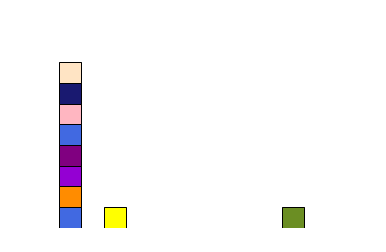

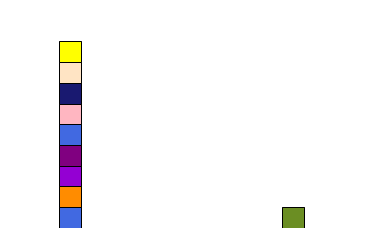

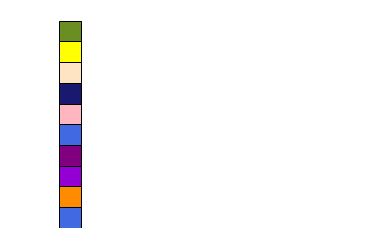

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem2.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem20.pddl


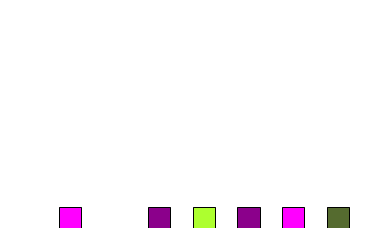

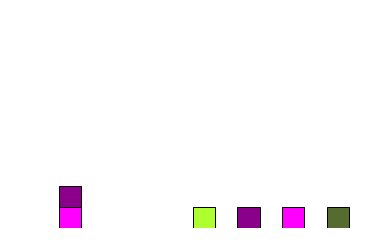

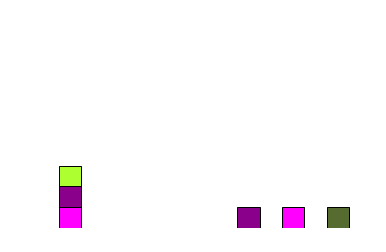

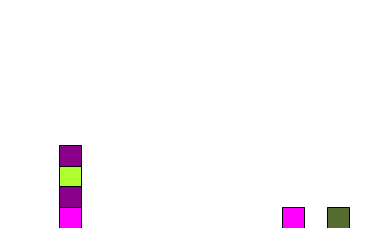

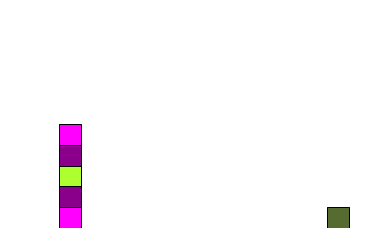

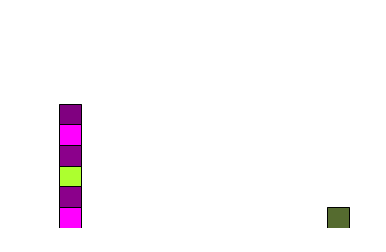

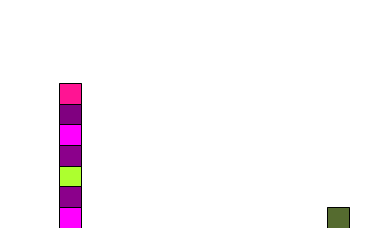

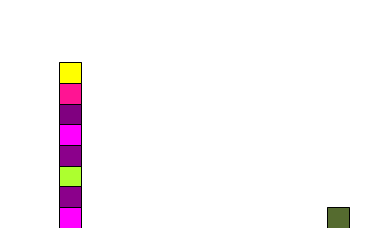

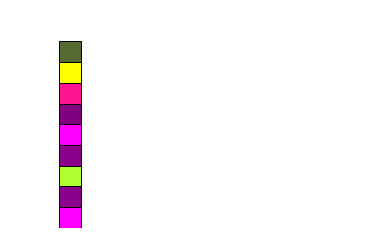

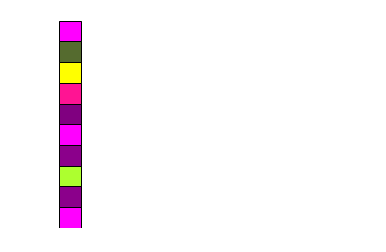

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem20.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem21.pddl


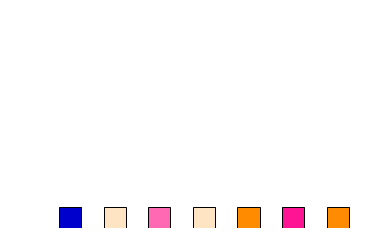

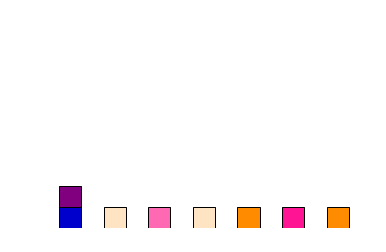

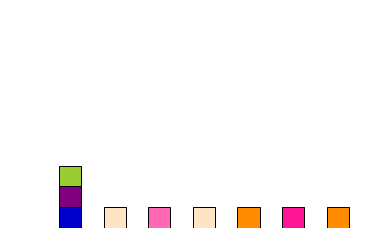

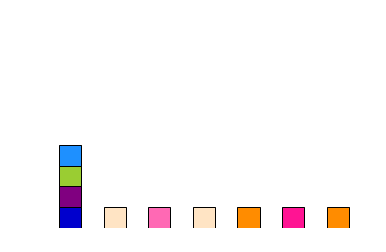

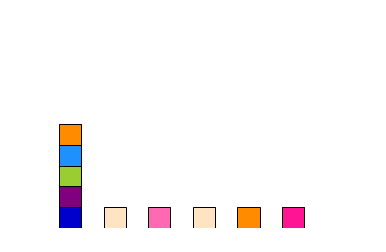

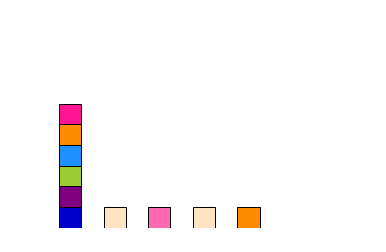

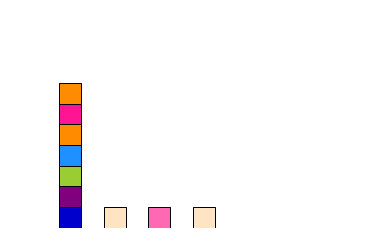

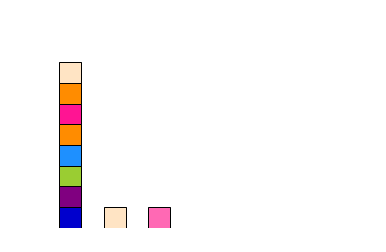

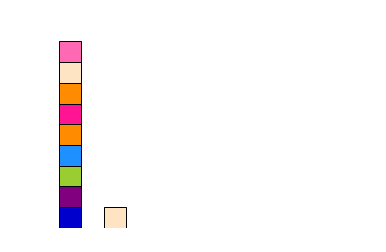

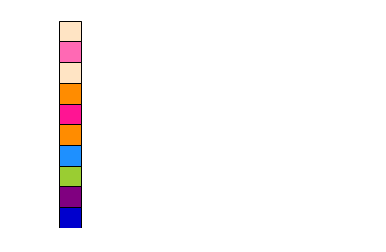

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem21.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem22.pddl


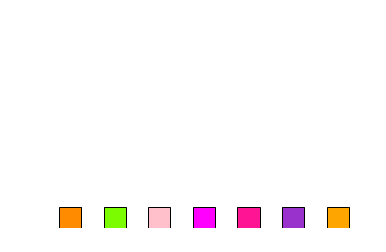

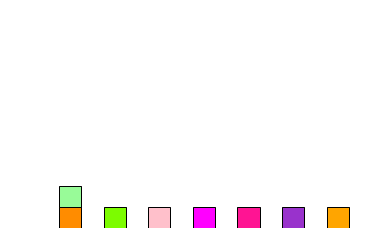

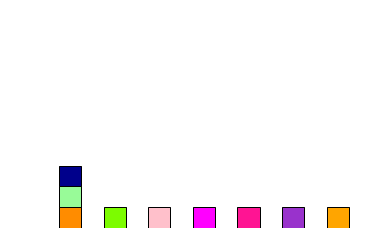

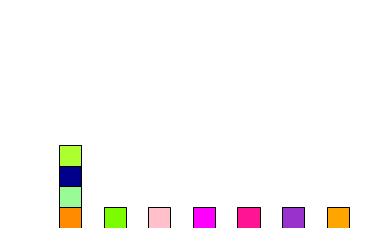

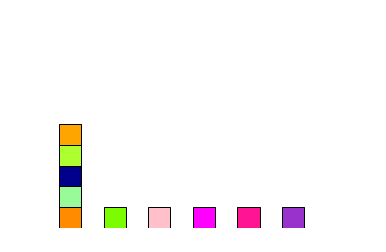

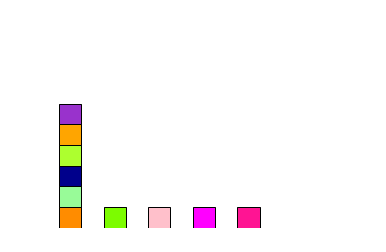

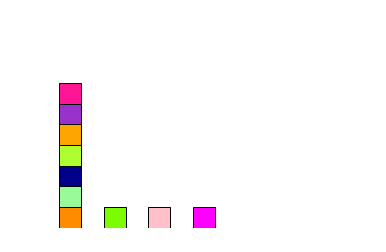

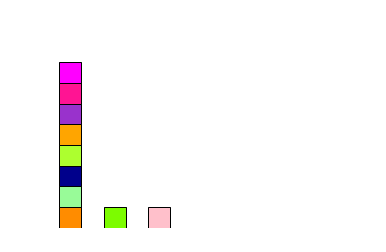

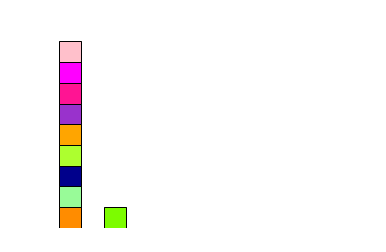

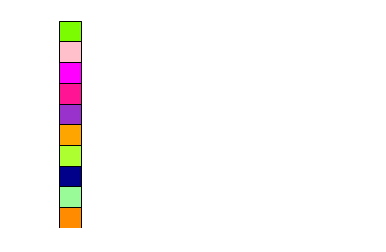

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem22.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem23.pddl


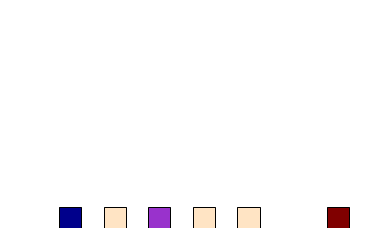

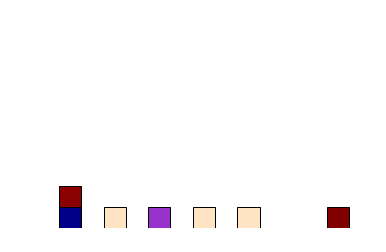

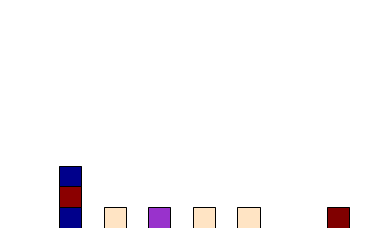

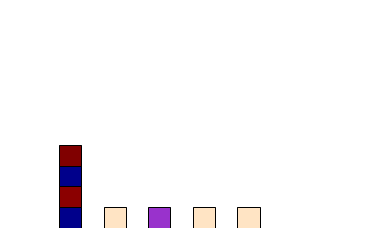

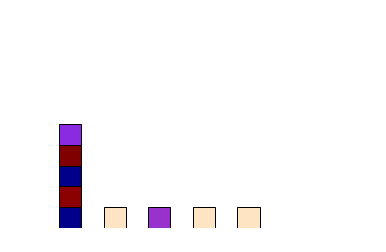

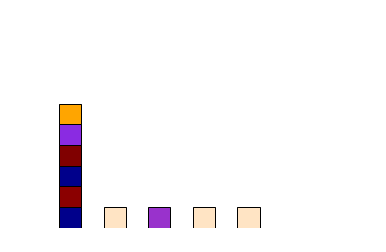

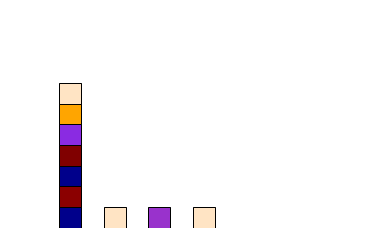

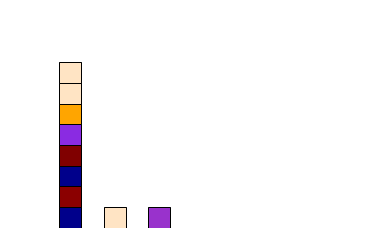

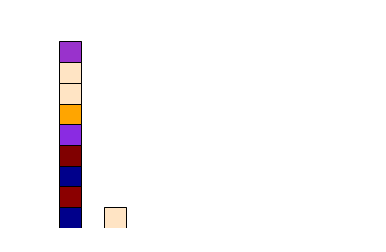

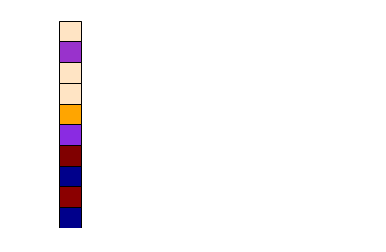

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem23.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem24.pddl


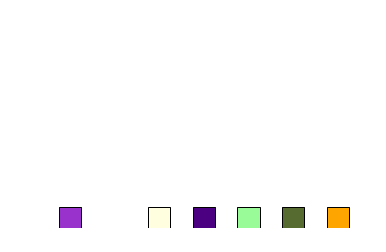

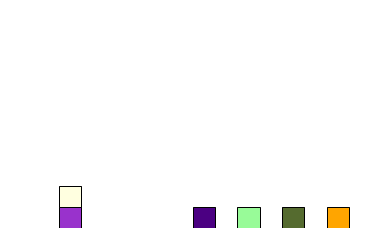

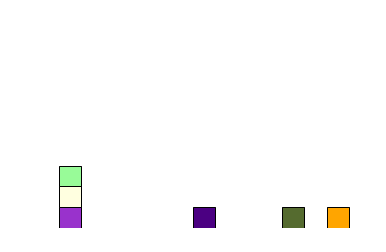

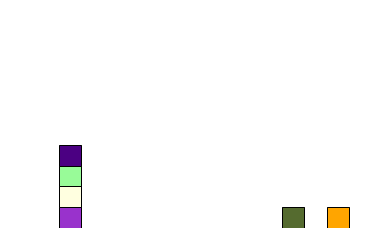

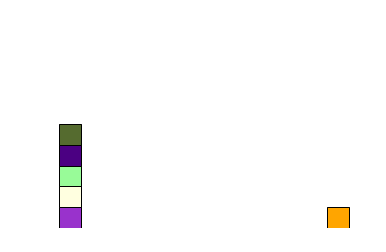

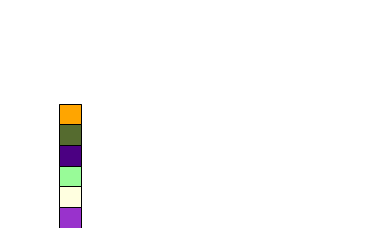

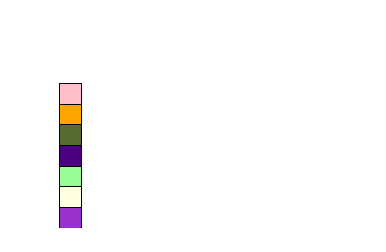

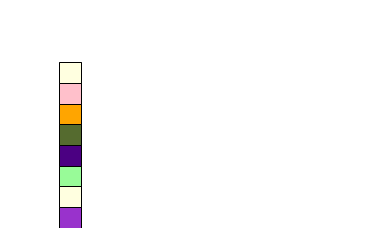

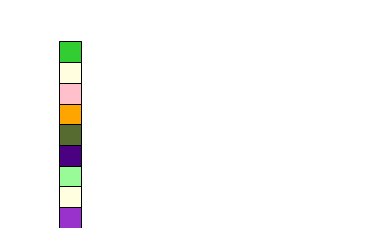

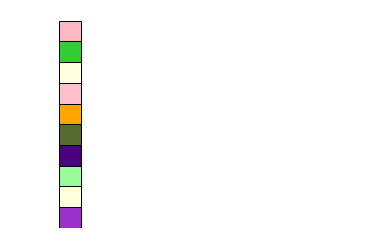

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem24.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem25.pddl


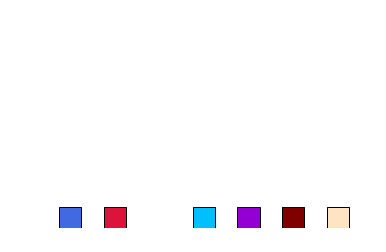

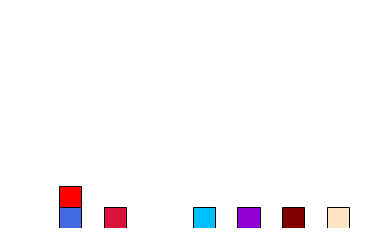

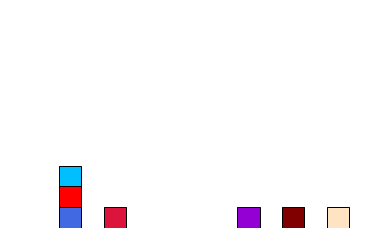

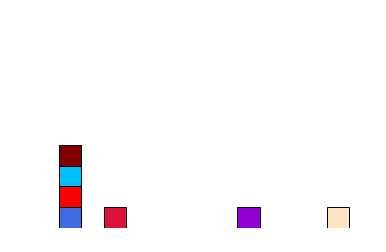

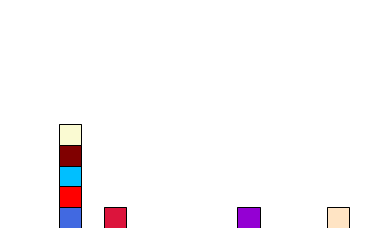

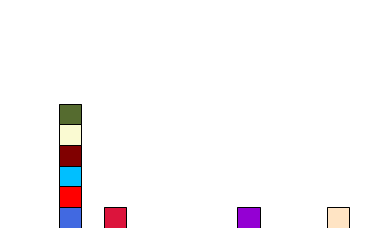

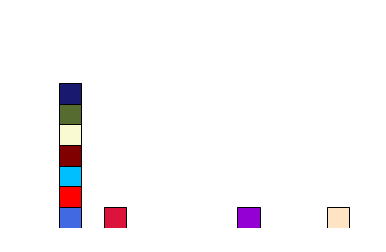

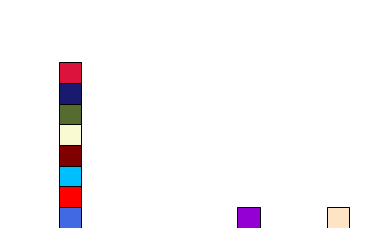

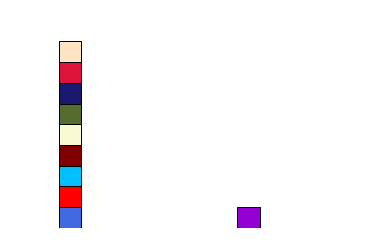

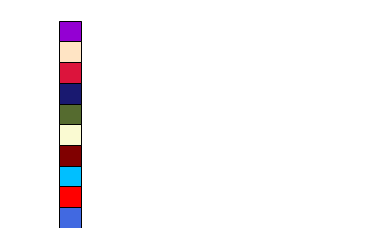

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem25.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem26.pddl


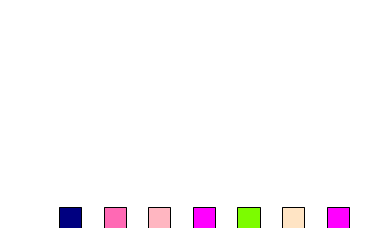

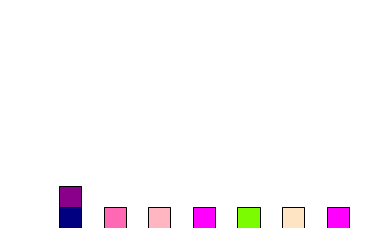

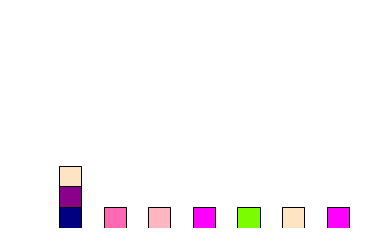

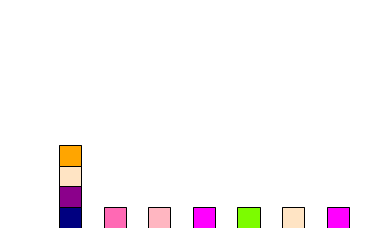

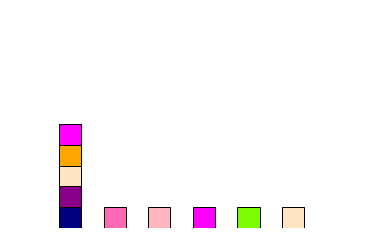

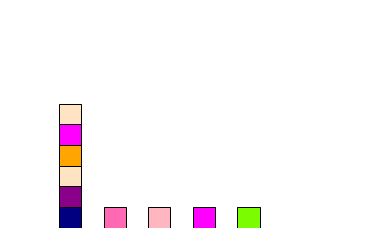

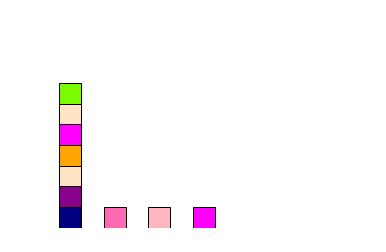

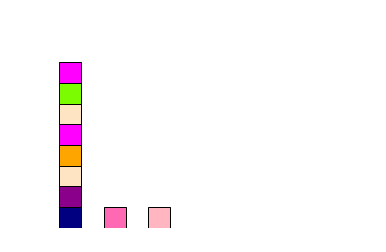

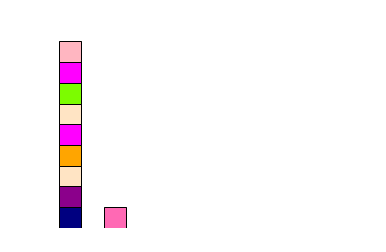

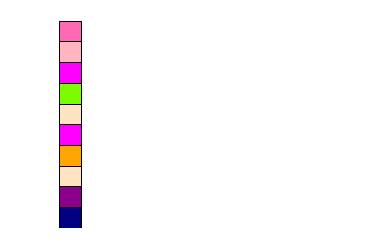

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem26.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem27.pddl


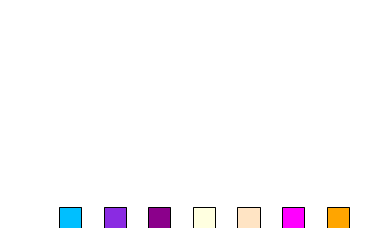

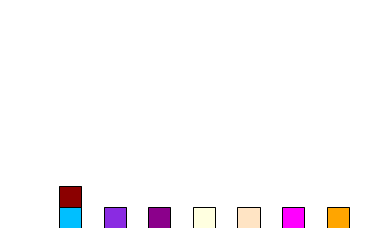

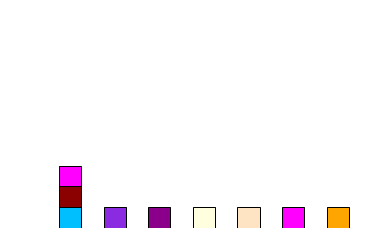

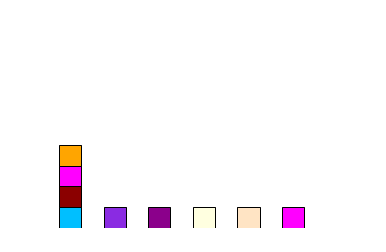

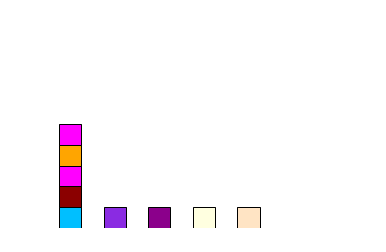

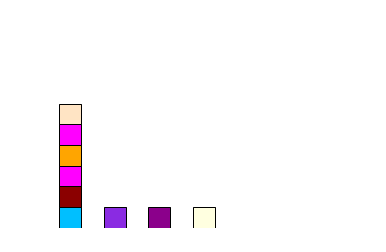

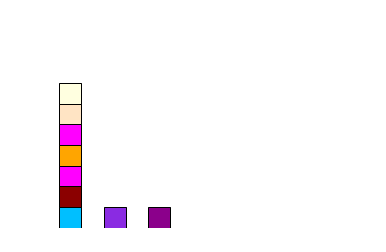

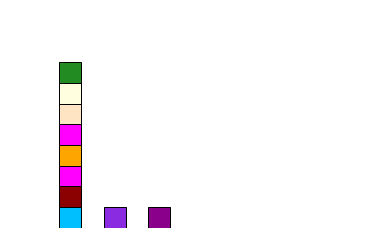

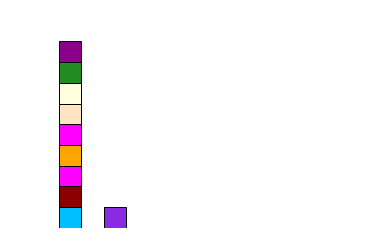

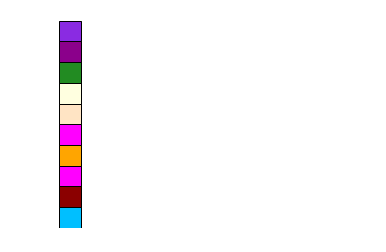

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem27.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem28.pddl


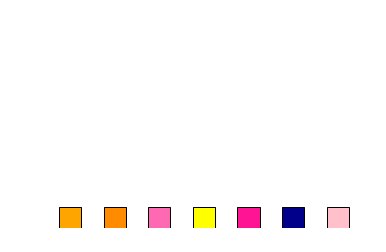

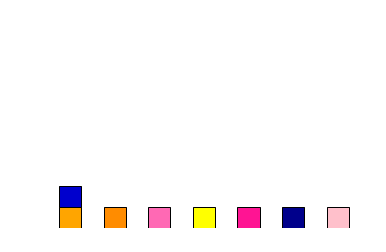

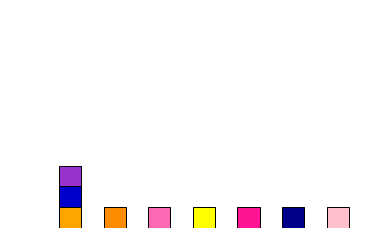

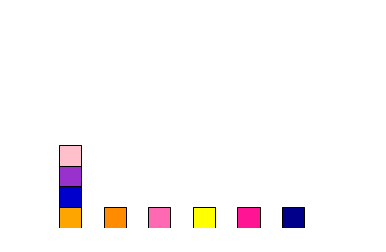

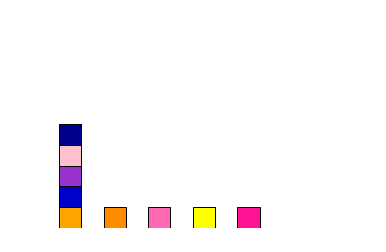

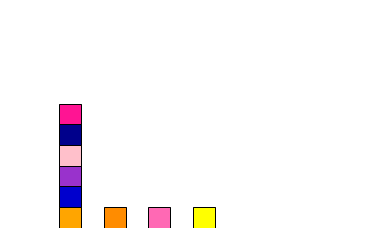

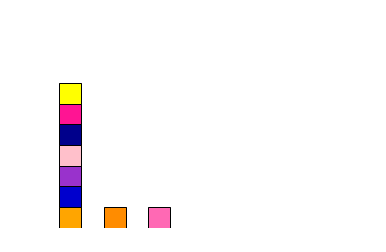

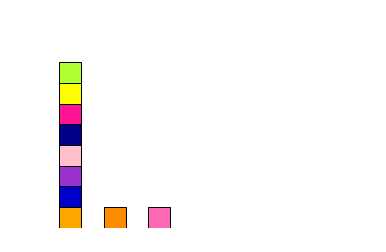

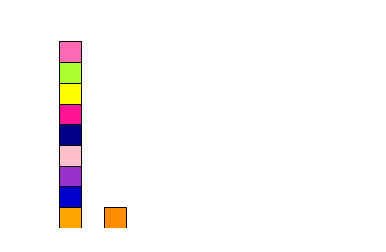

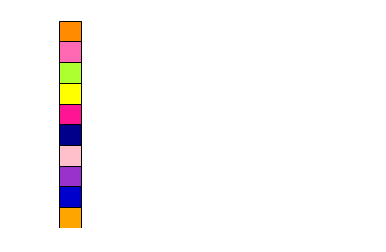

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem28.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem29.pddl


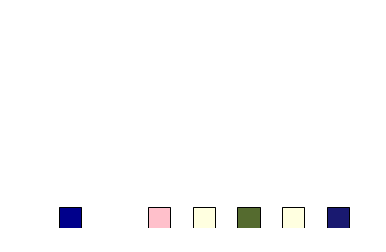

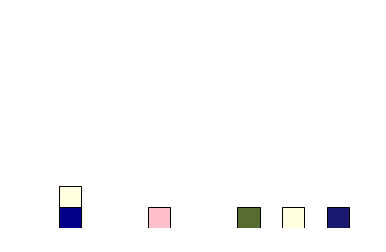

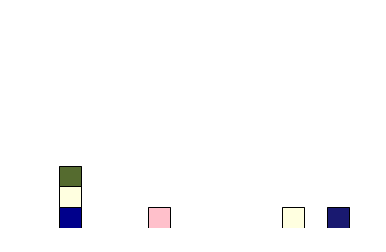

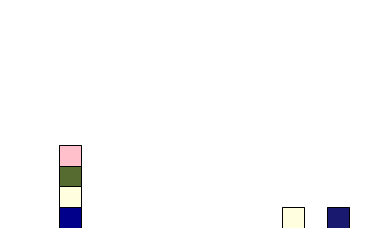

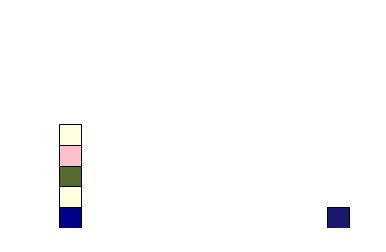

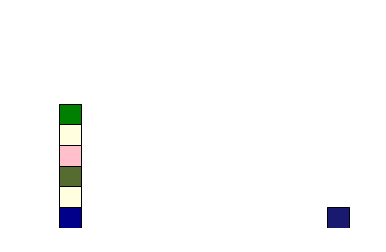

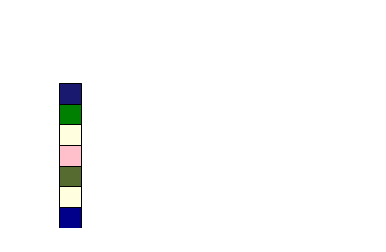

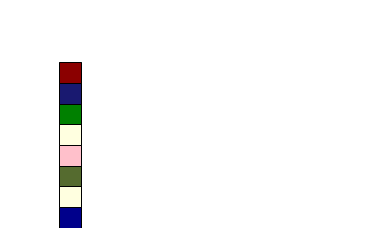

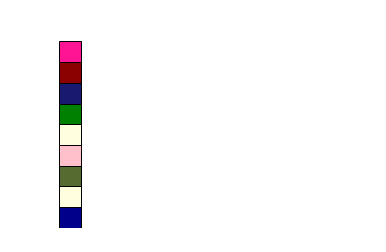

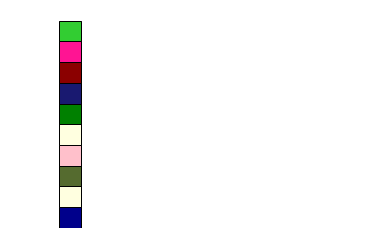

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem29.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem3.pddl


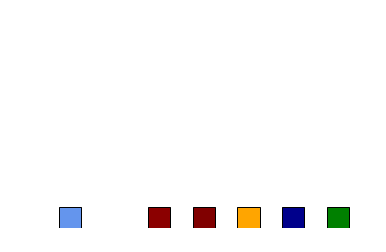

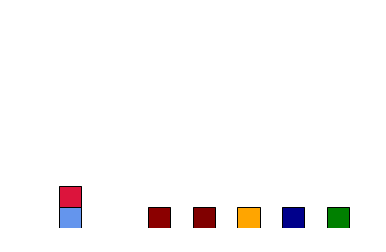

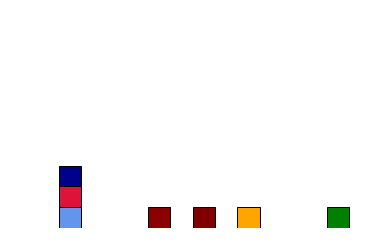

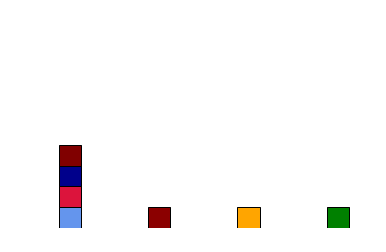

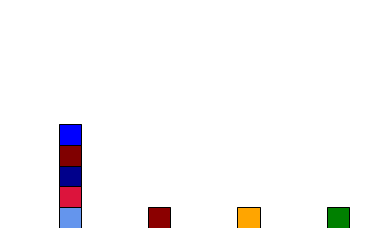

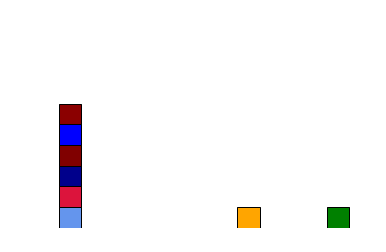

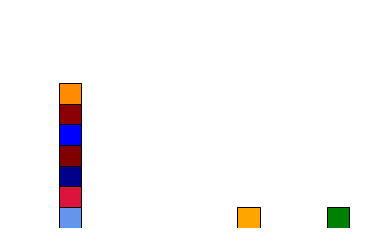

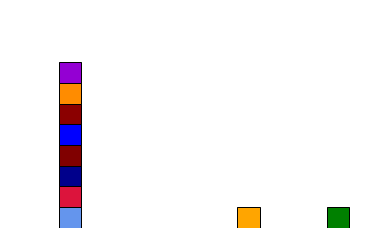

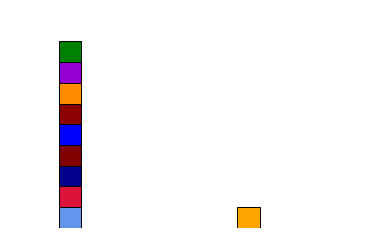

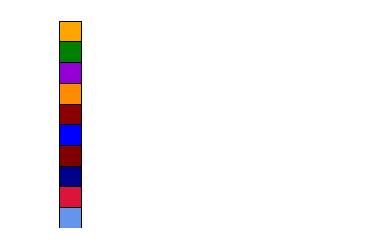

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem3.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem30.pddl


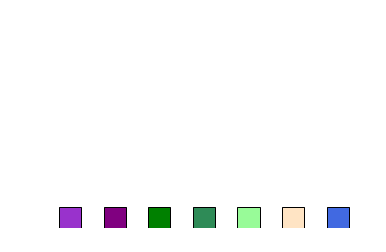

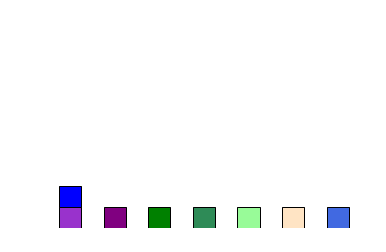

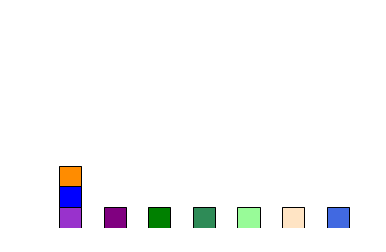

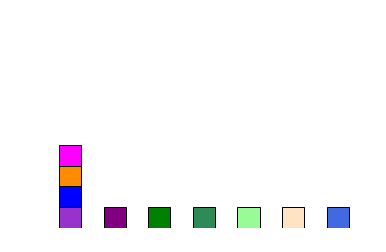

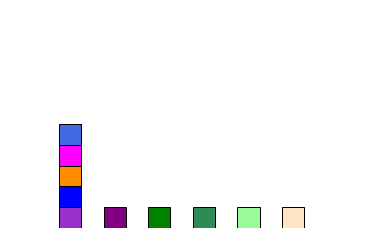

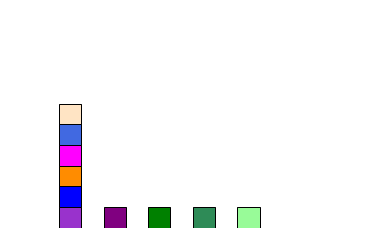

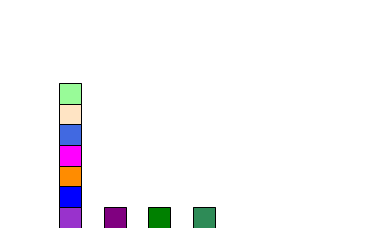

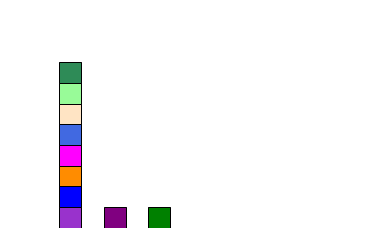

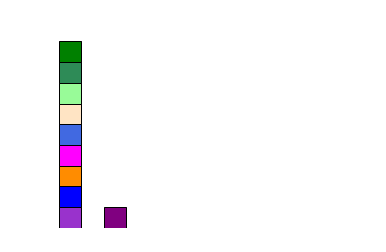

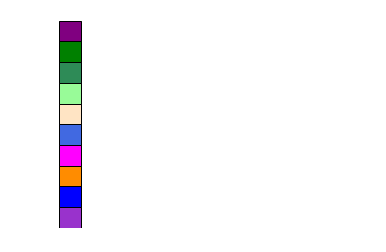

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem30.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem31.pddl


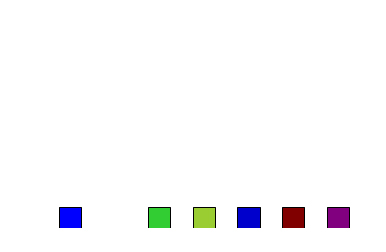

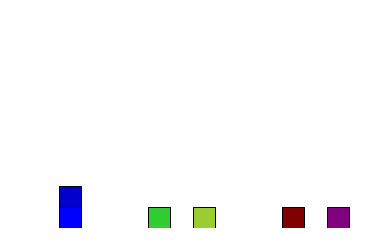

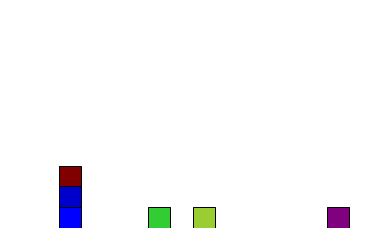

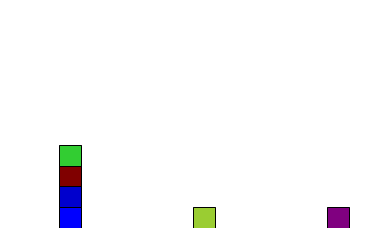

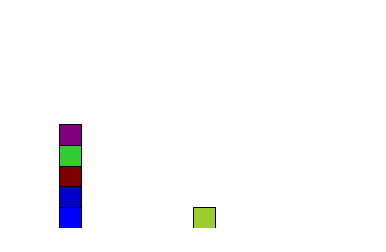

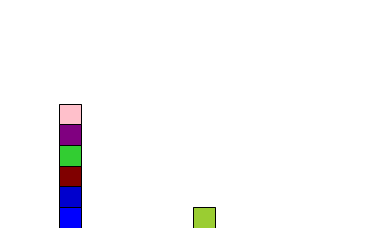

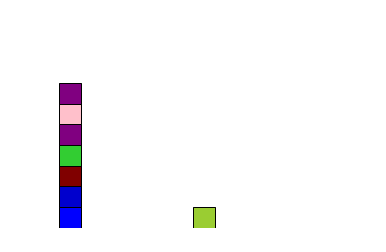

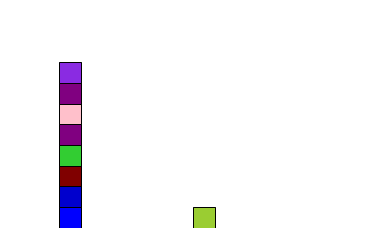

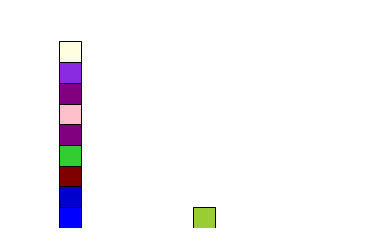

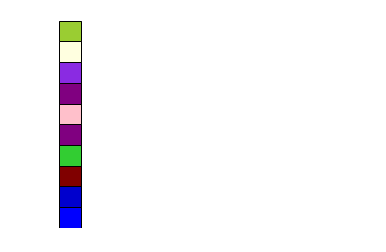

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem31.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem32.pddl


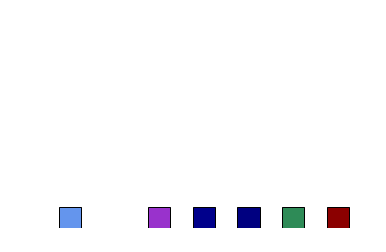

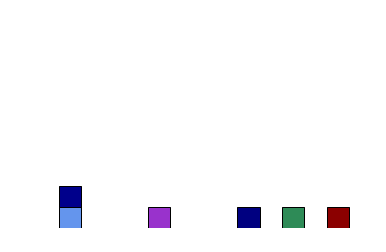

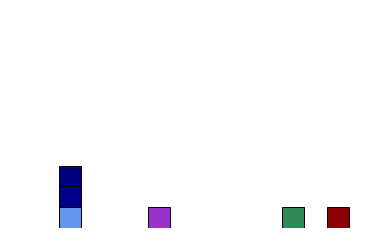

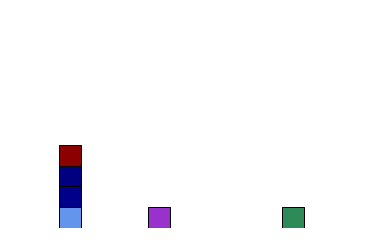

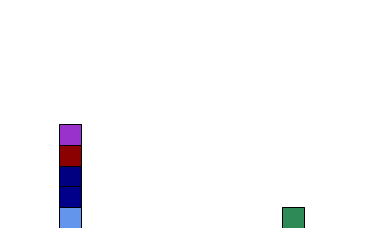

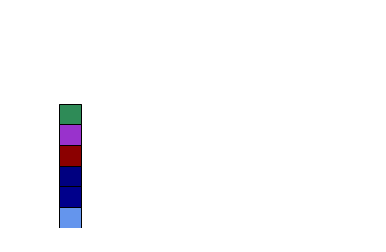

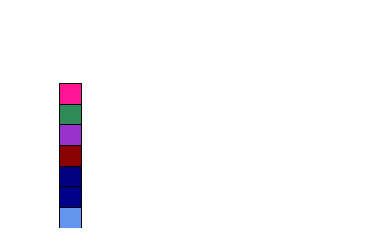

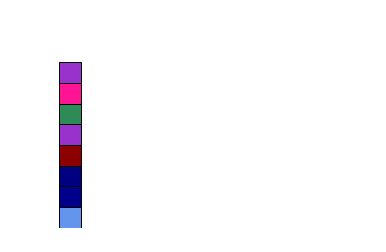

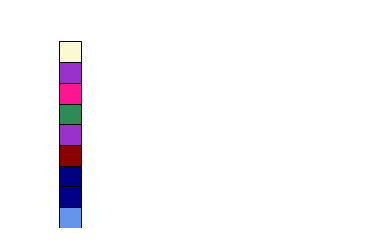

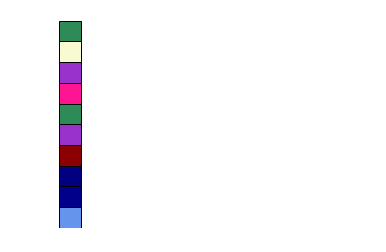

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem32.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem33.pddl


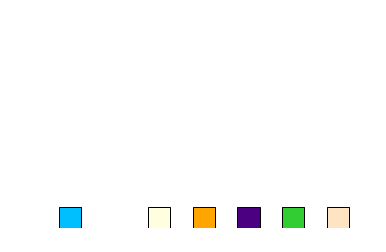

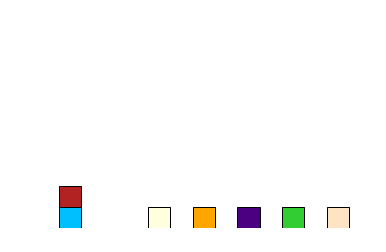

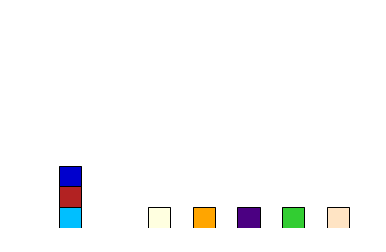

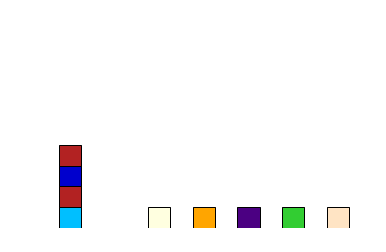

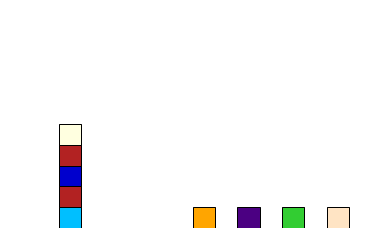

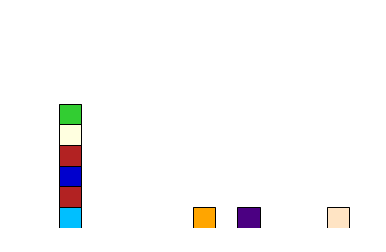

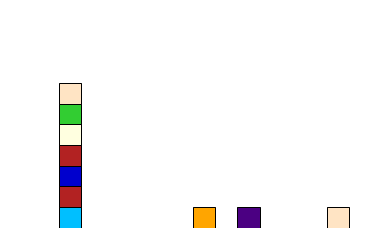

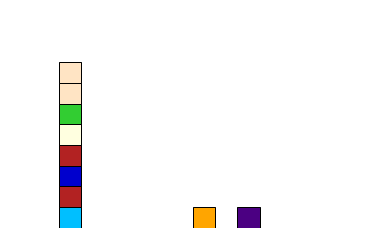

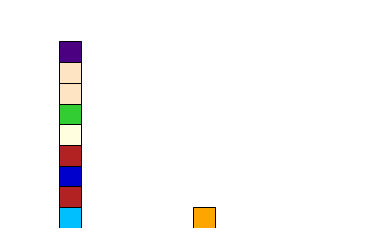

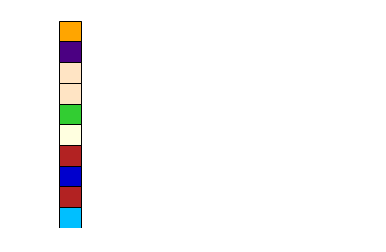

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem33.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem34.pddl


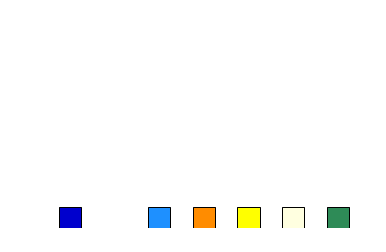

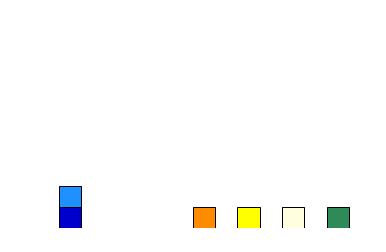

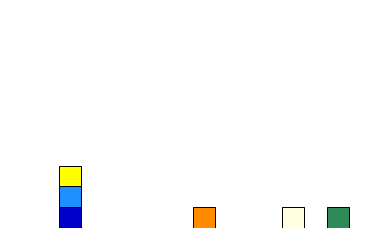

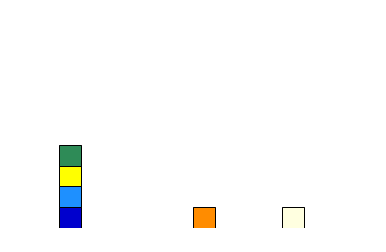

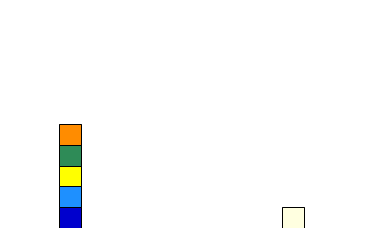

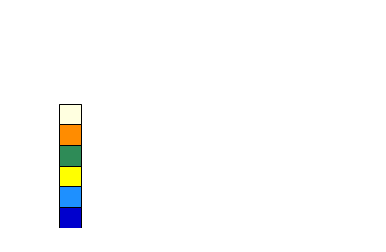

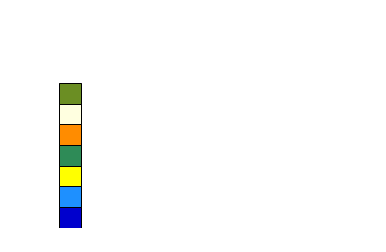

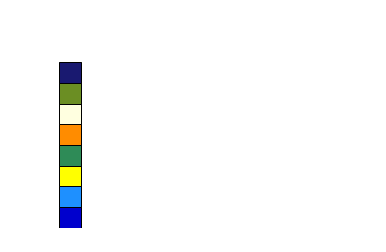

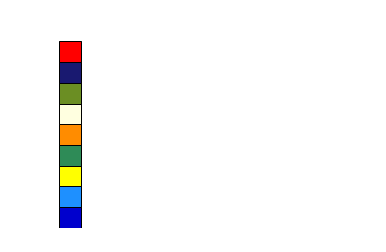

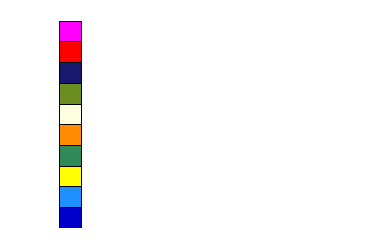

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem34.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem35.pddl


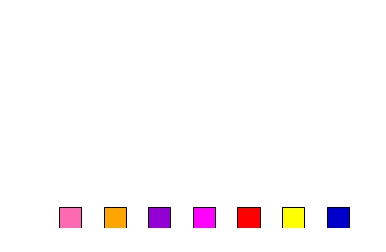

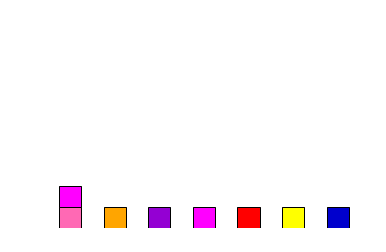

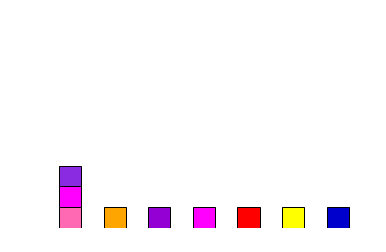

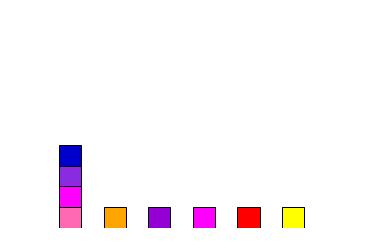

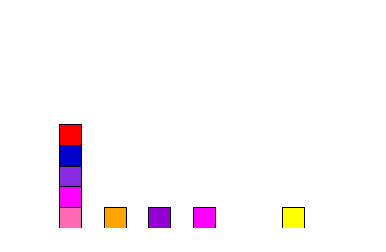

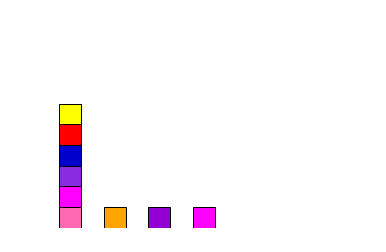

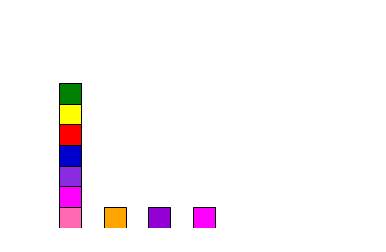

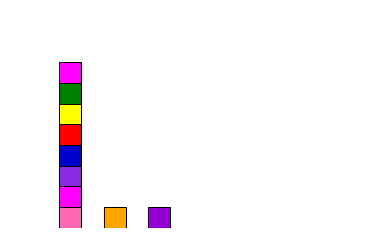

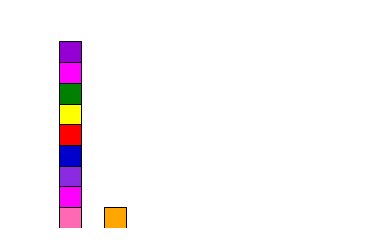

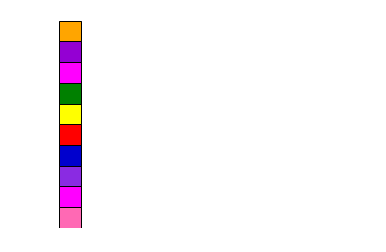

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem35.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem36.pddl


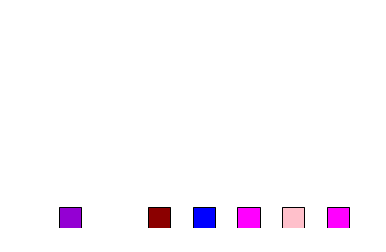

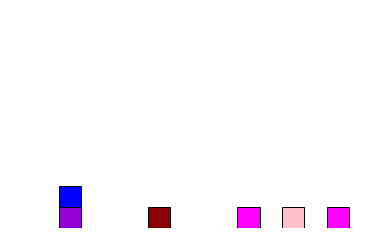

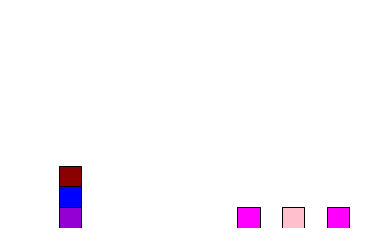

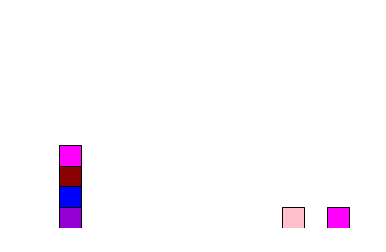

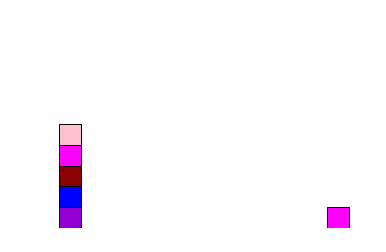

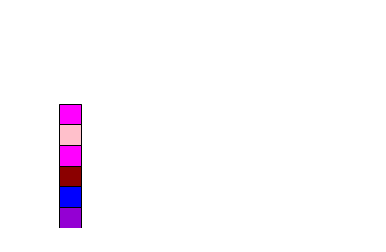

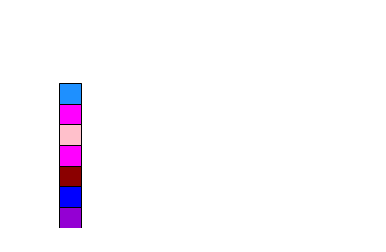

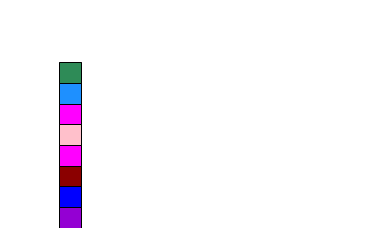

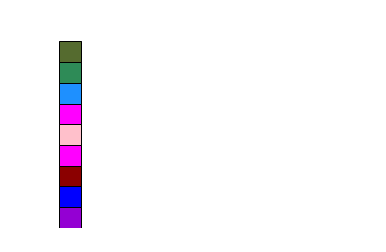

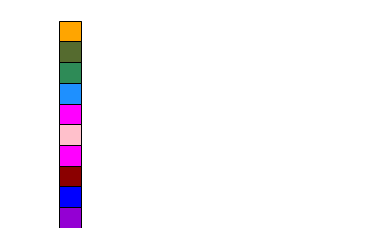

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem36.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem37.pddl


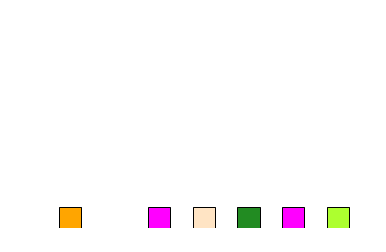

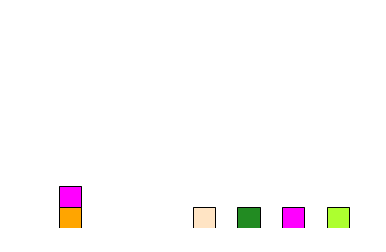

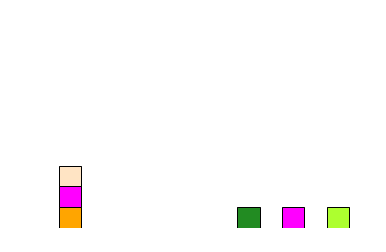

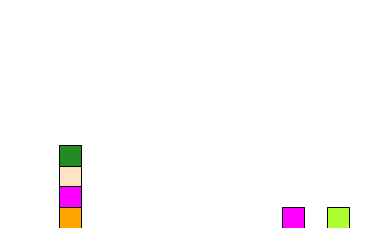

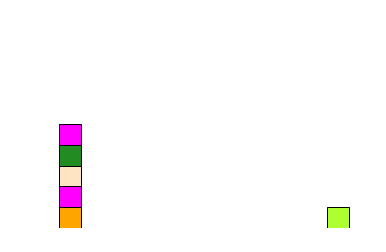

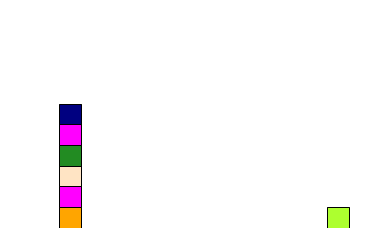

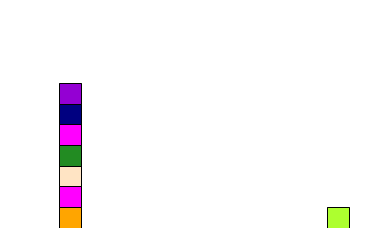

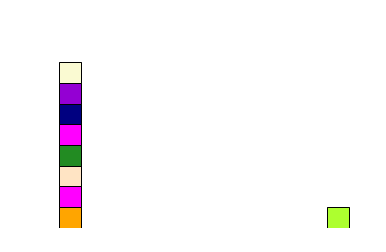

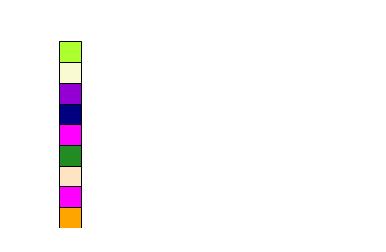

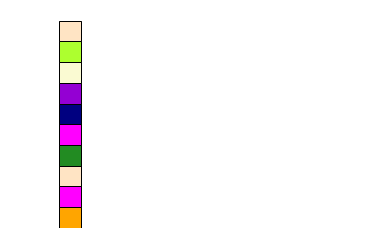

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem37.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem38.pddl


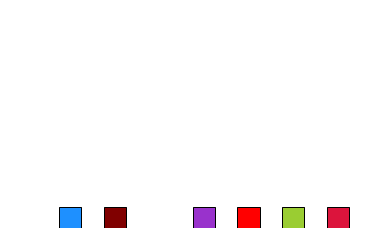

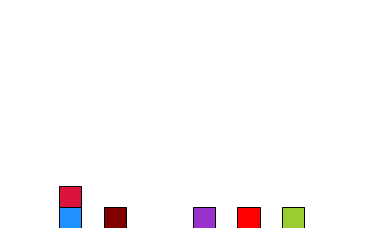

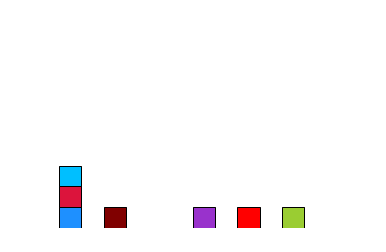

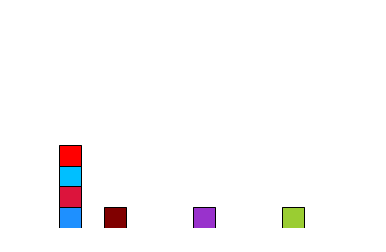

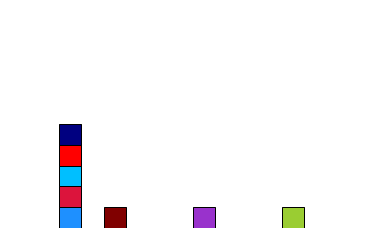

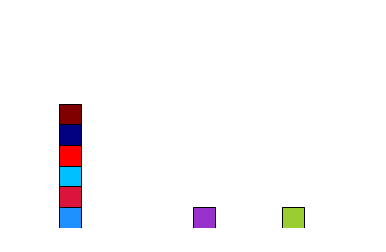

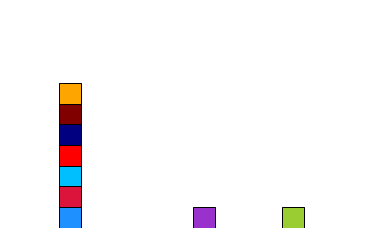

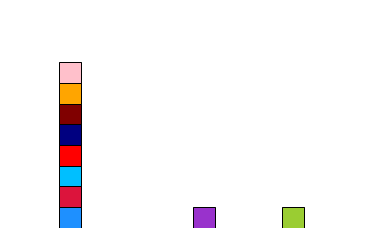

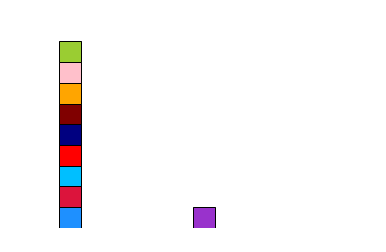

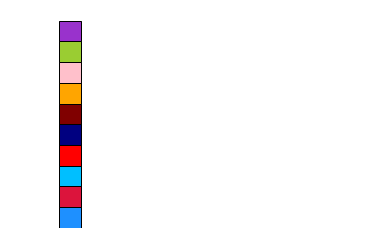

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem38.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem39.pddl


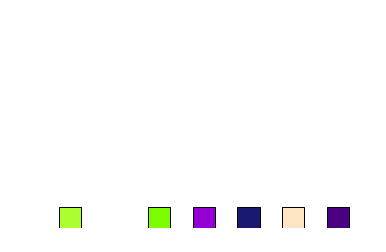

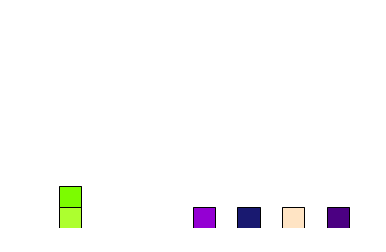

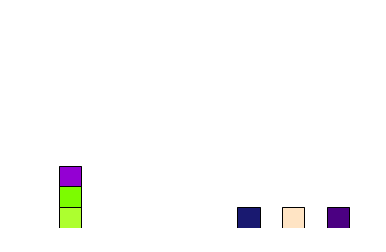

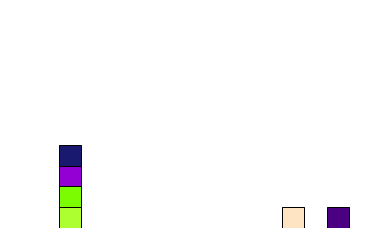

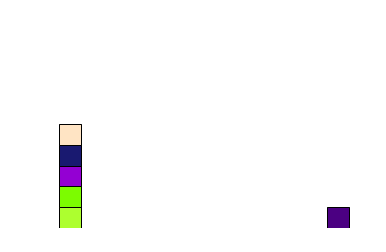

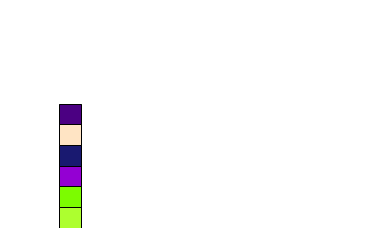

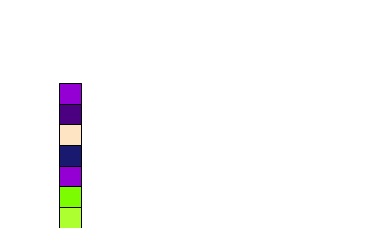

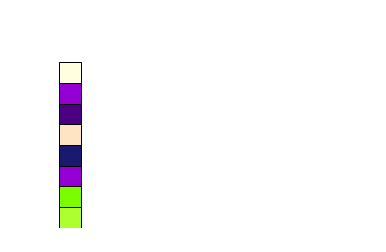

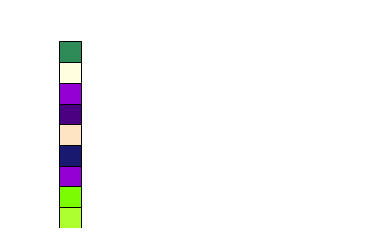

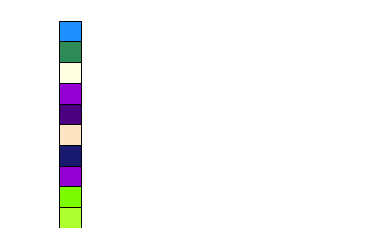

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem39.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem4.pddl


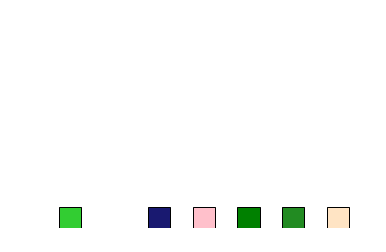

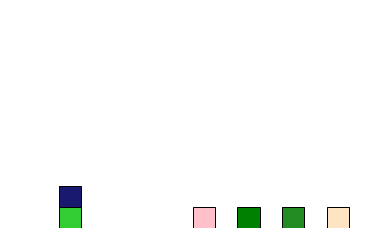

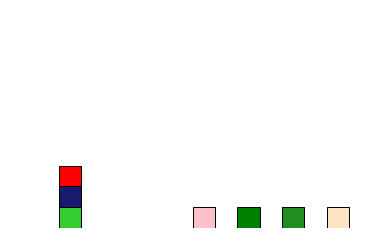

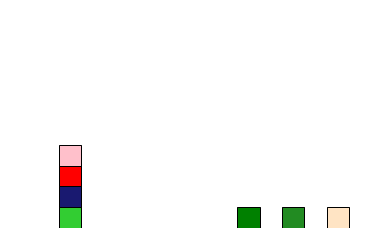

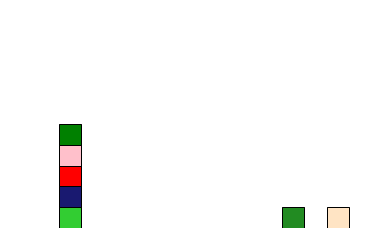

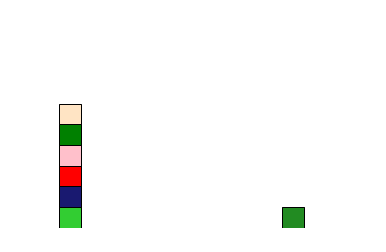

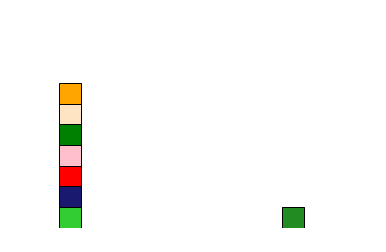

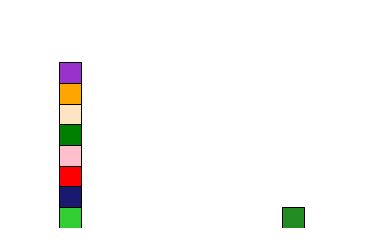

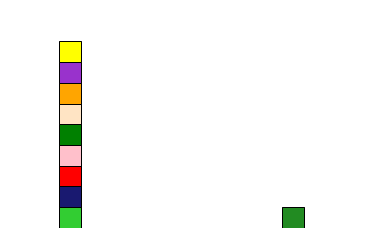

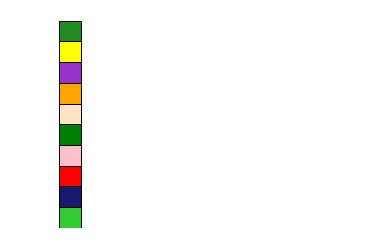

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem4.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem40.pddl


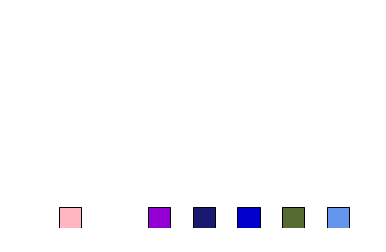

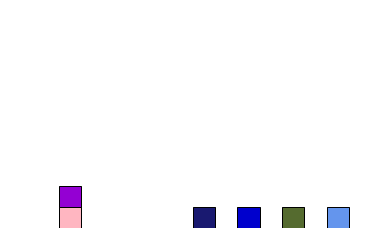

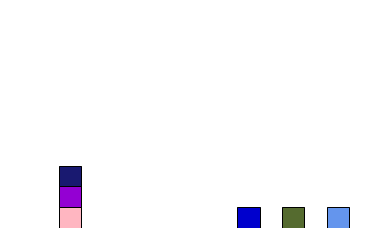

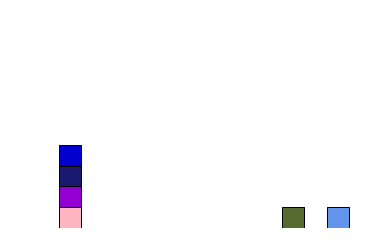

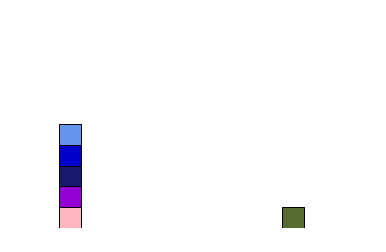

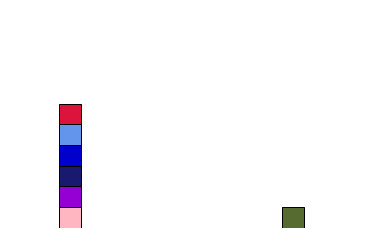

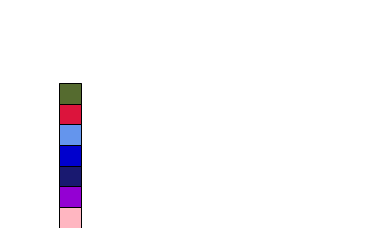

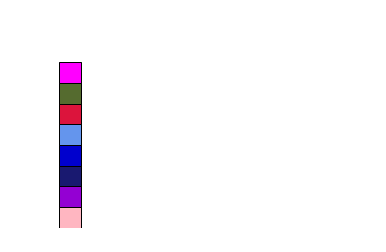

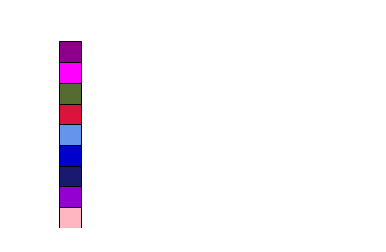

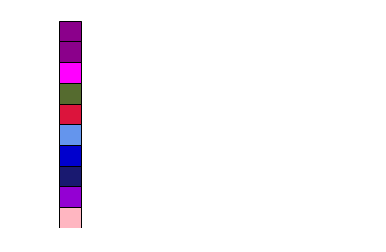

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem40.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem41.pddl


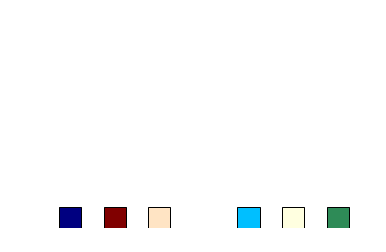

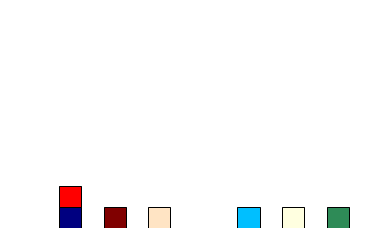

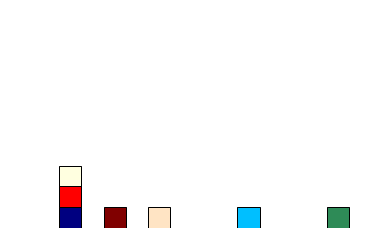

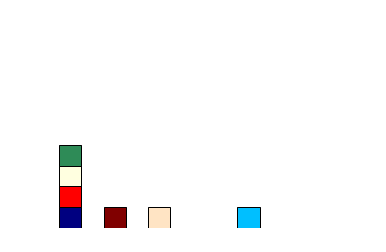

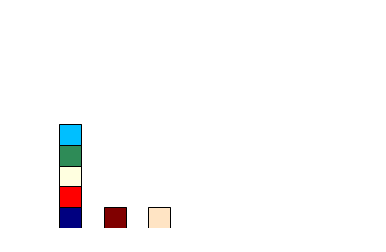

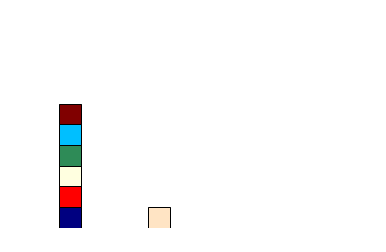

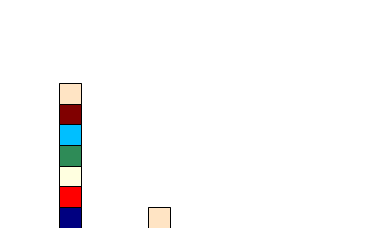

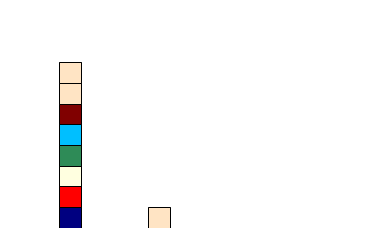

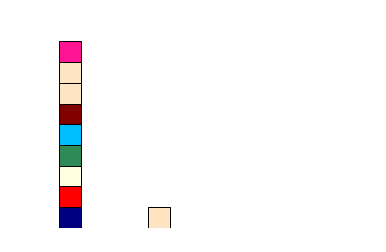

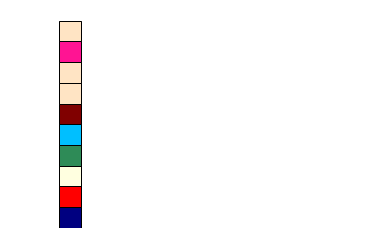

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem41.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem42.pddl


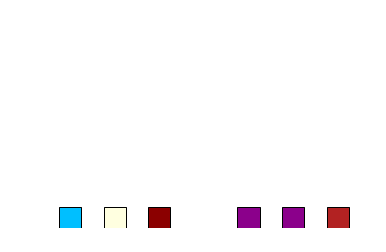

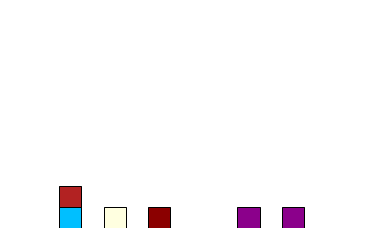

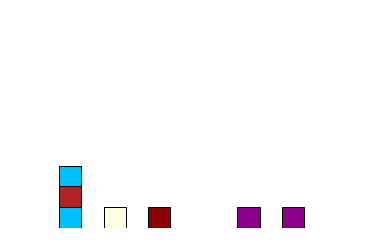

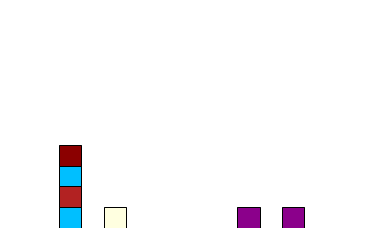

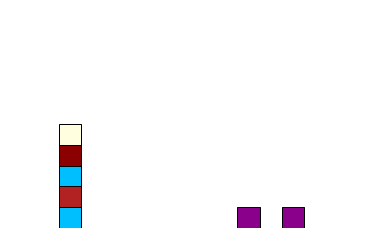

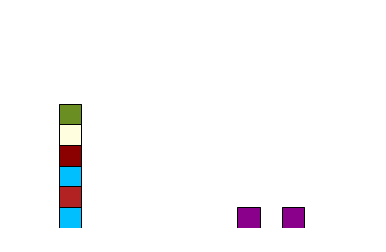

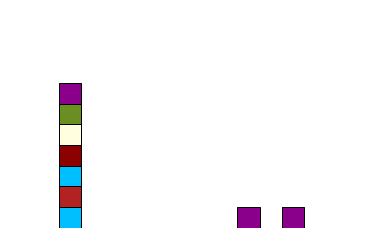

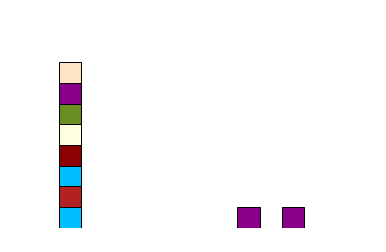

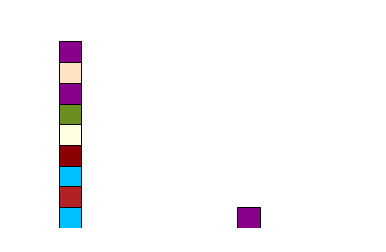

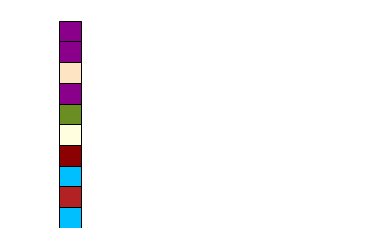

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem42.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem43.pddl


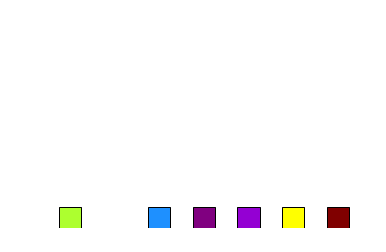

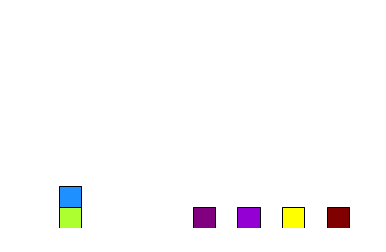

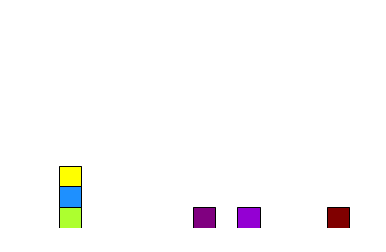

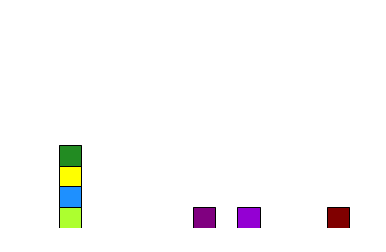

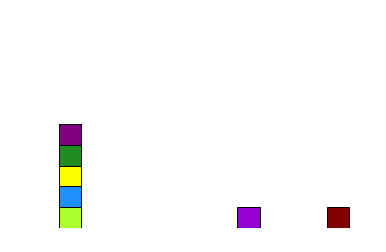

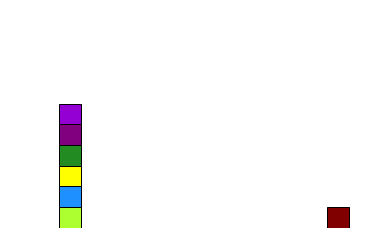

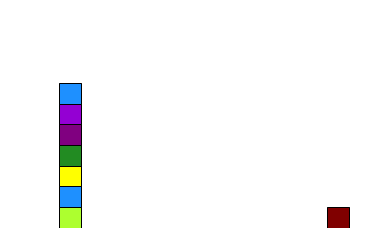

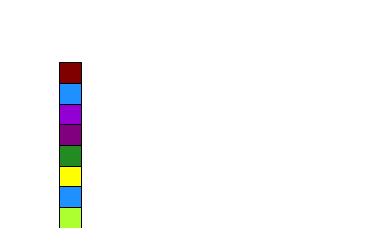

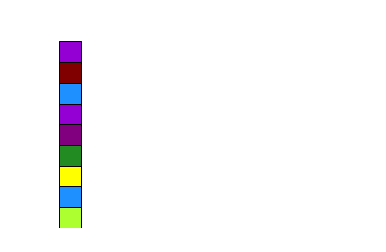

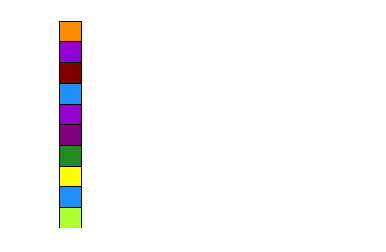

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem43.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem44.pddl


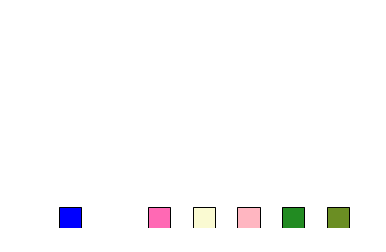

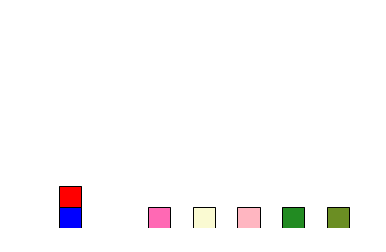

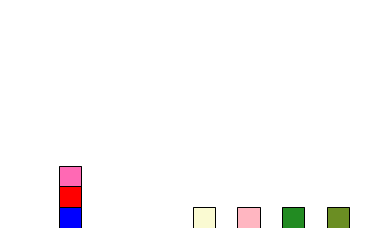

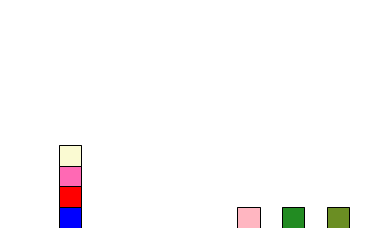

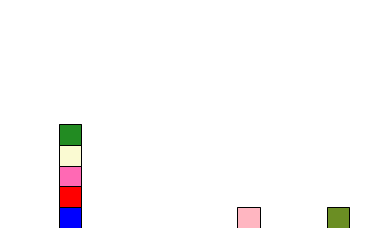

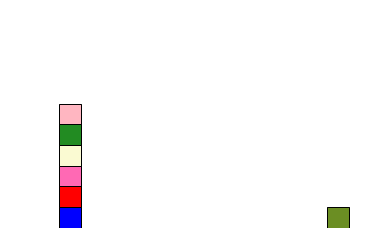

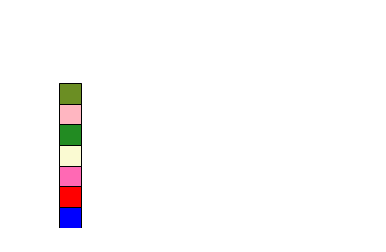

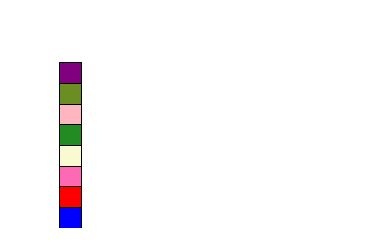

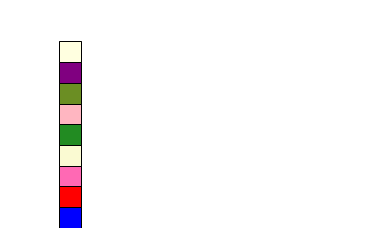

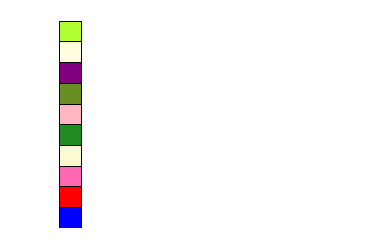

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem44.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem45.pddl


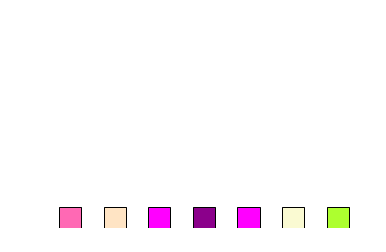

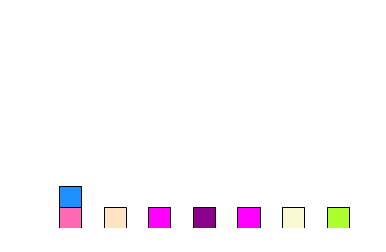

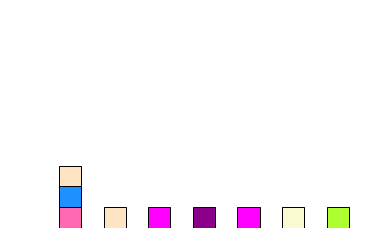

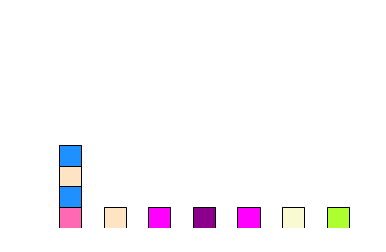

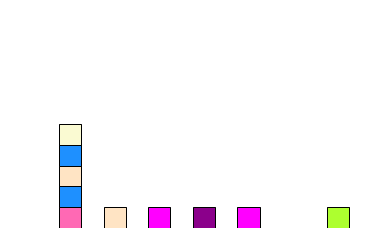

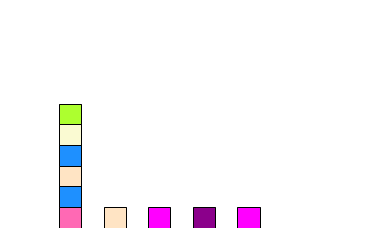

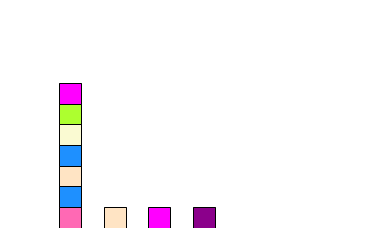

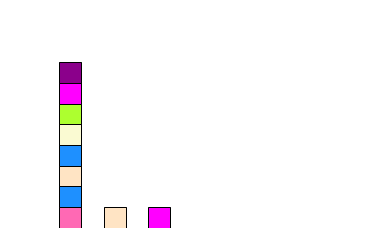

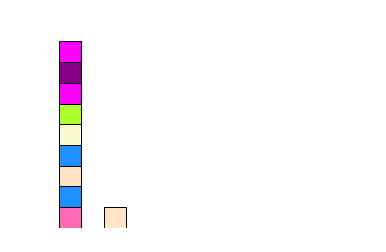

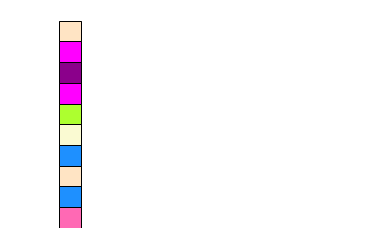

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem45.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem46.pddl


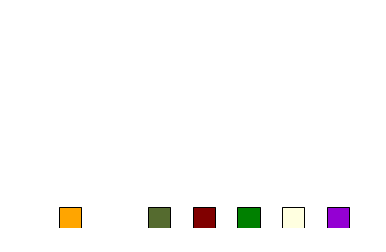

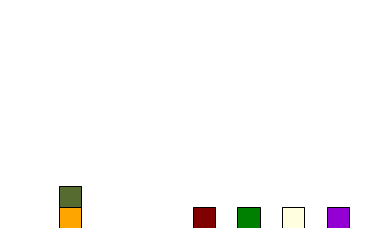

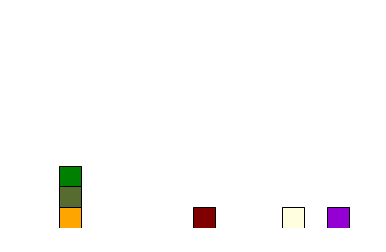

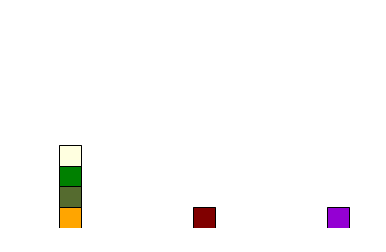

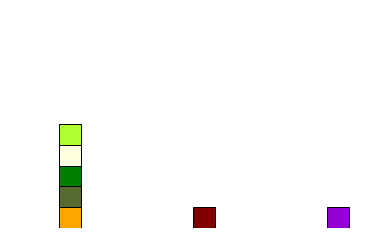

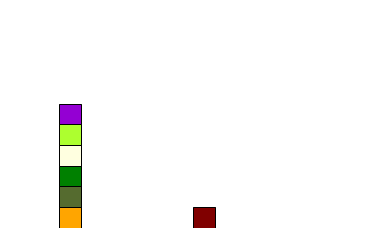

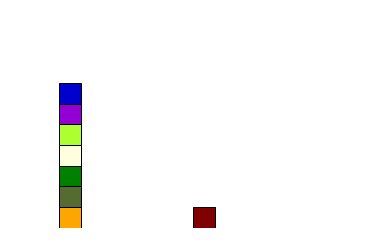

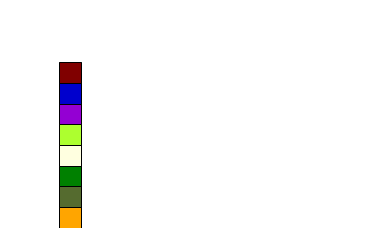

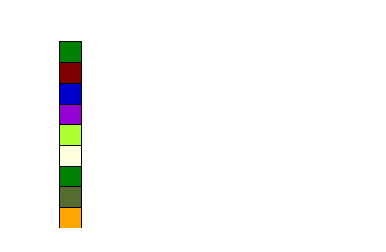

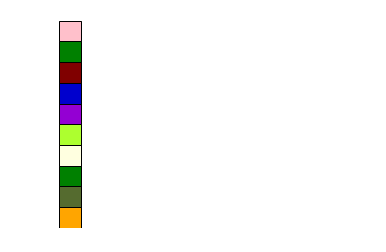

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem46.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem47.pddl


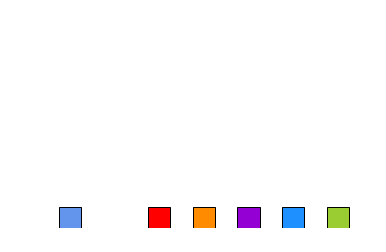

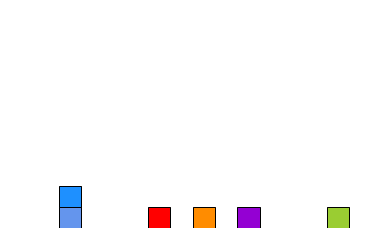

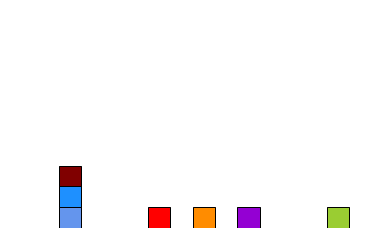

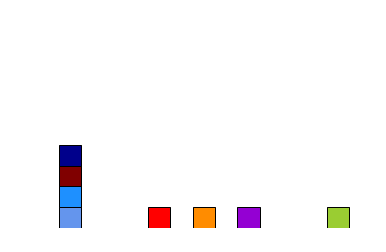

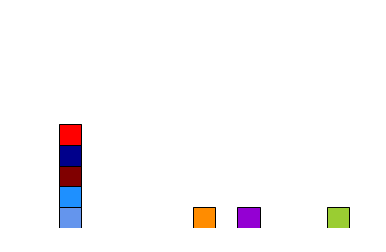

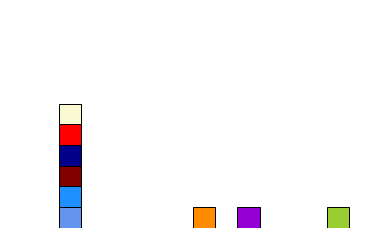

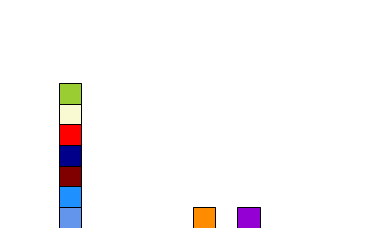

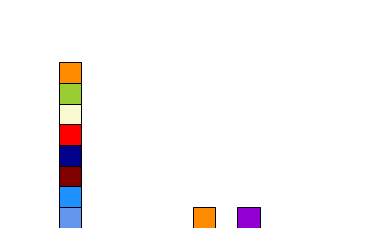

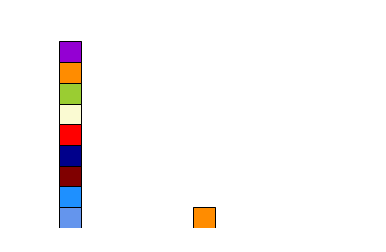

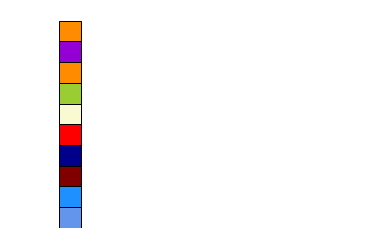

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem47.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem48.pddl


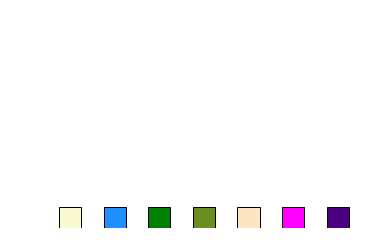

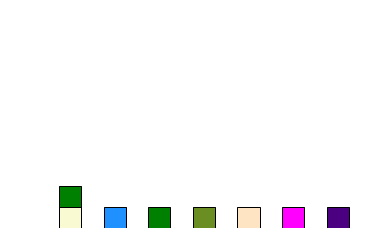

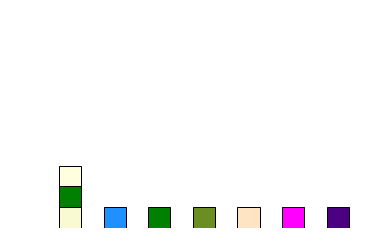

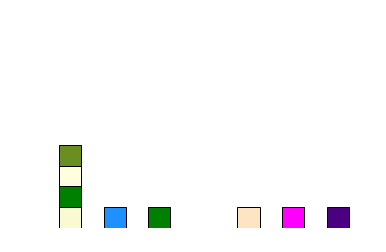

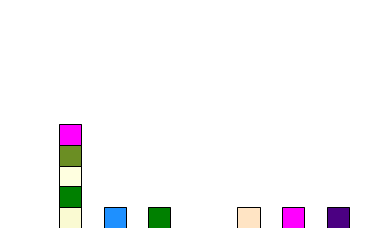

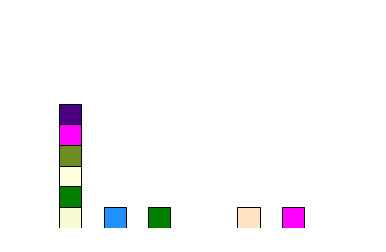

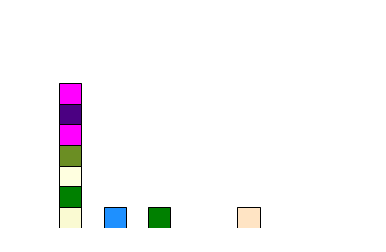

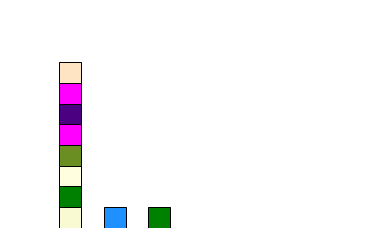

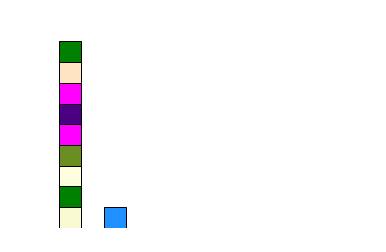

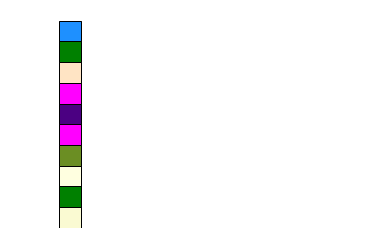

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem48.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem49.pddl


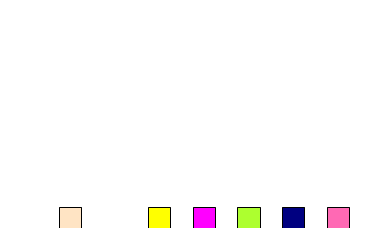

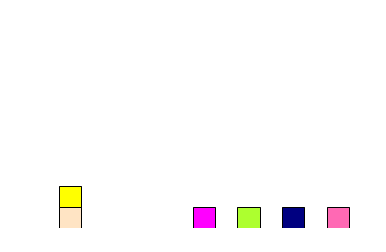

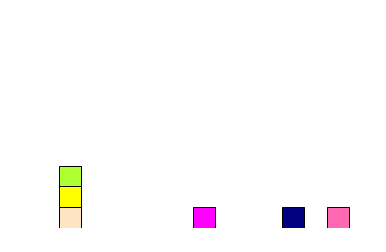

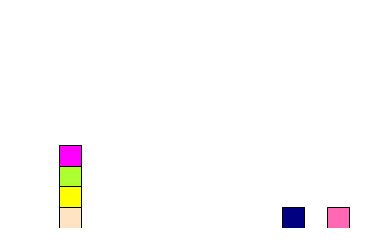

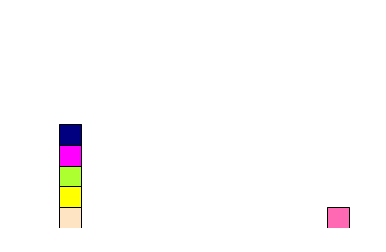

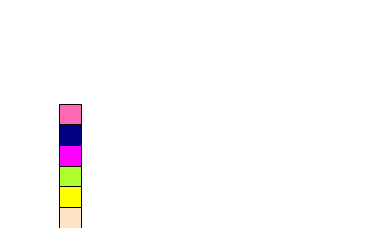

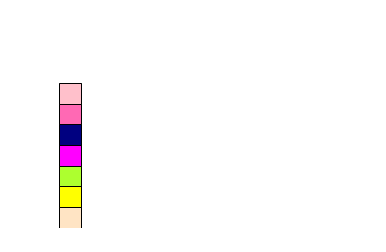

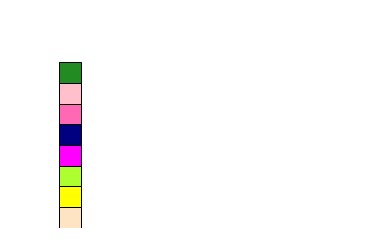

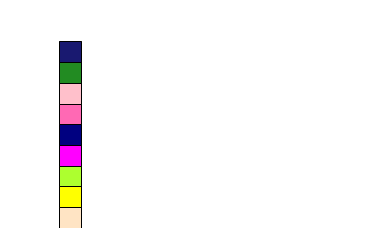

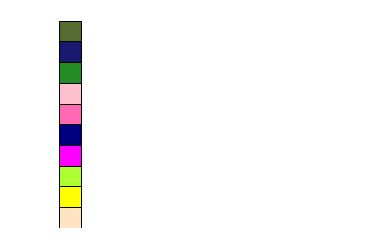

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem49.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem5.pddl


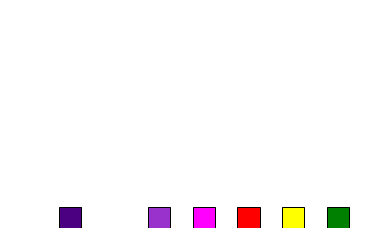

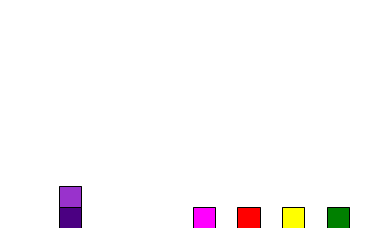

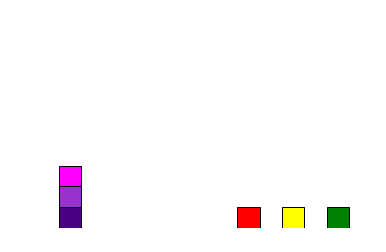

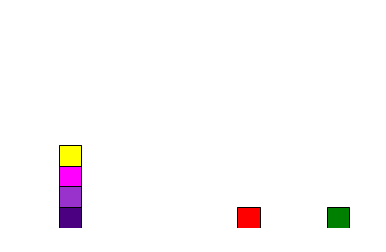

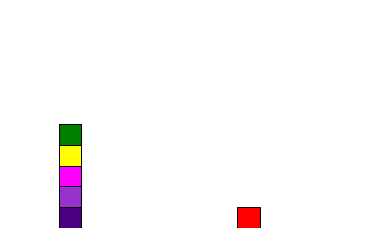

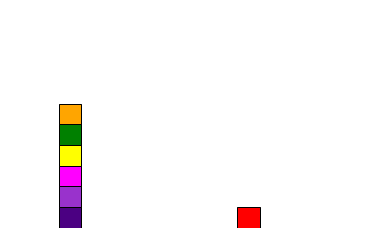

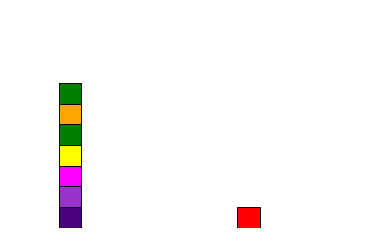

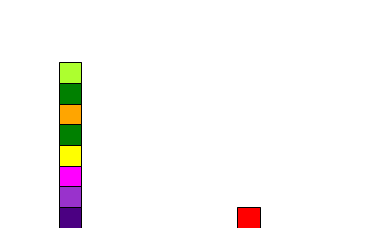

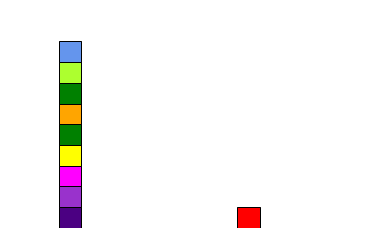

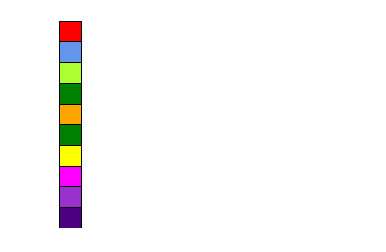

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem5.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem50.pddl


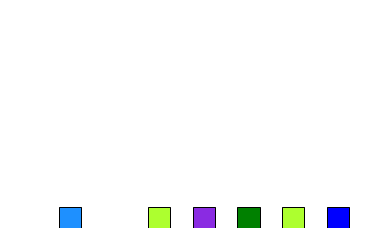

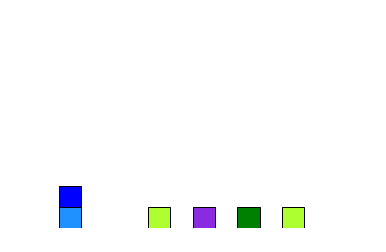

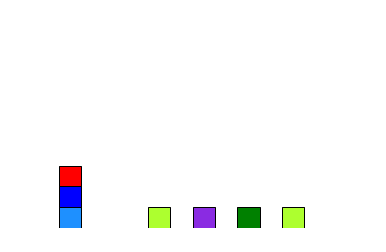

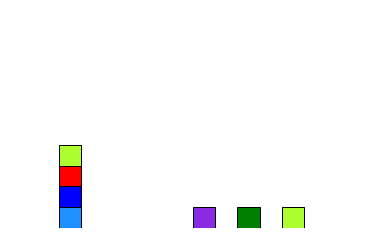

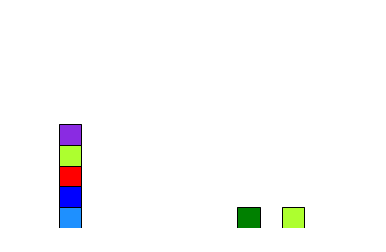

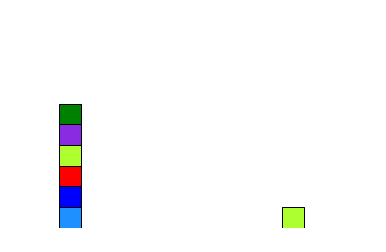

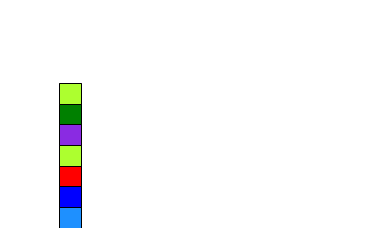

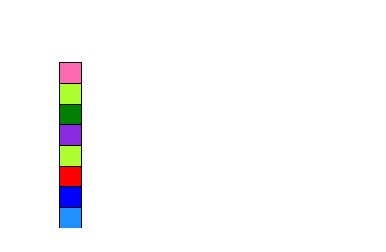

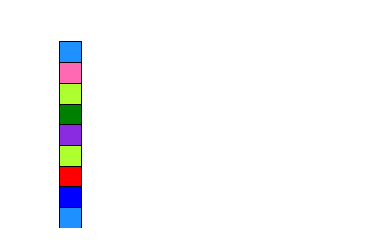

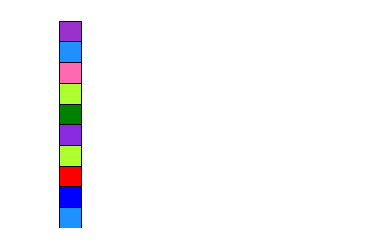

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem50.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem6.pddl


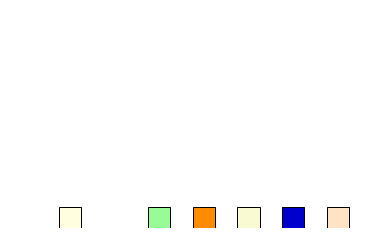

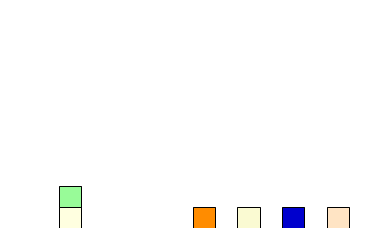

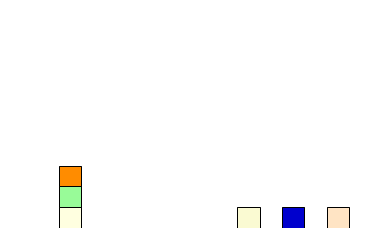

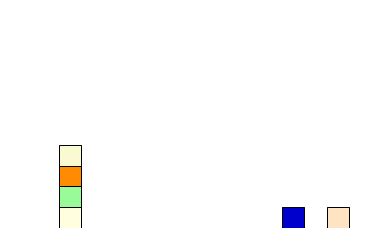

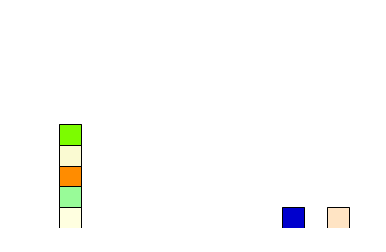

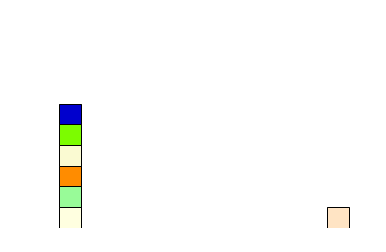

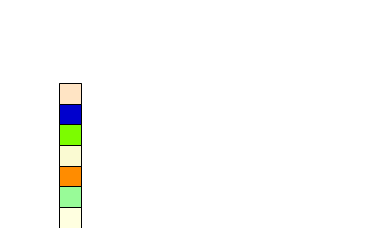

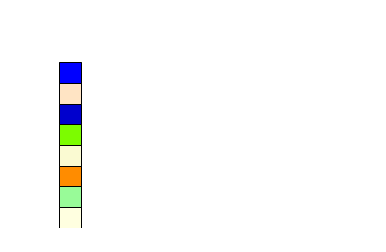

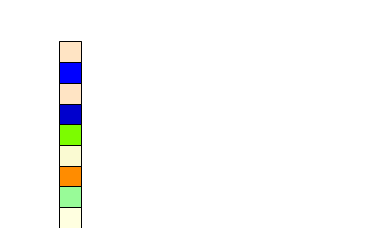

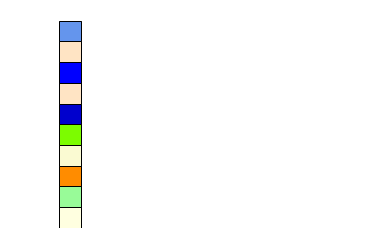

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem6.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem7.pddl


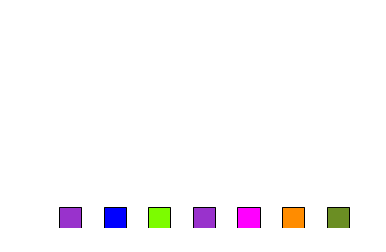

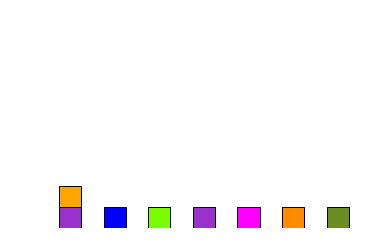

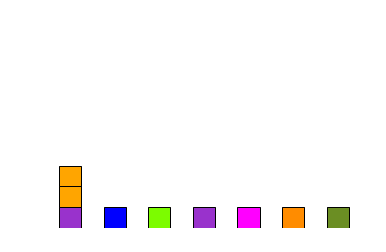

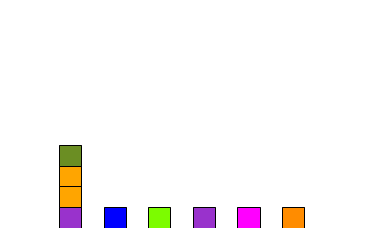

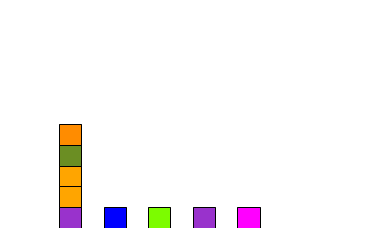

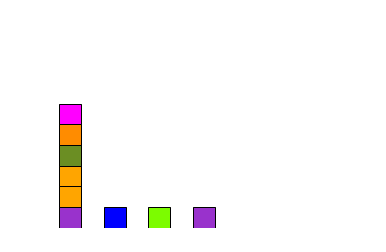

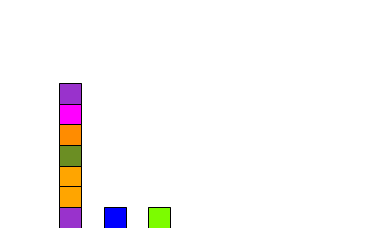

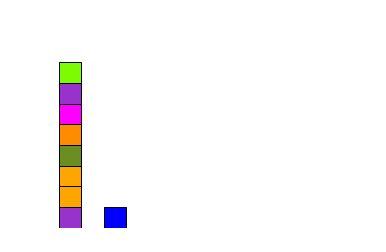

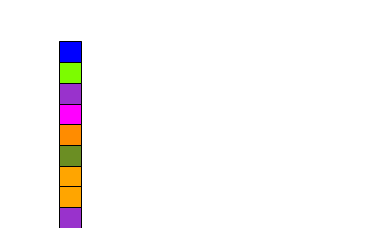

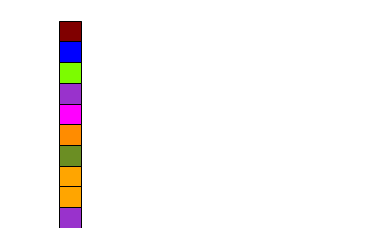

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem7.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem8.pddl


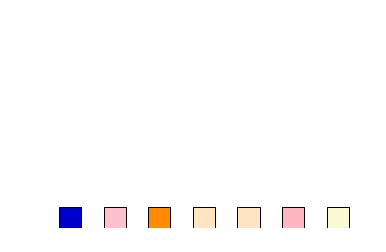

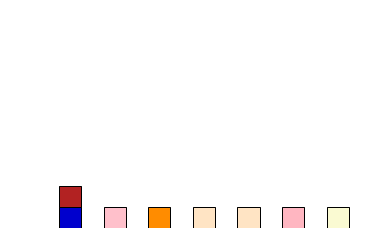

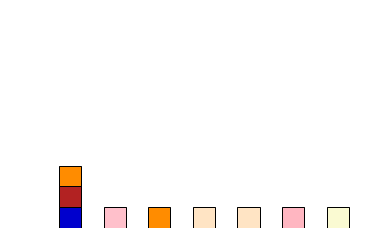

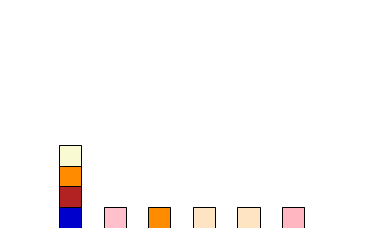

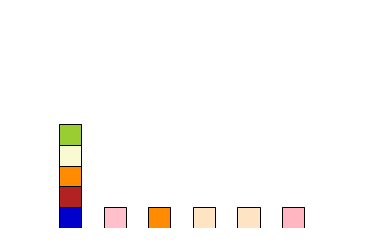

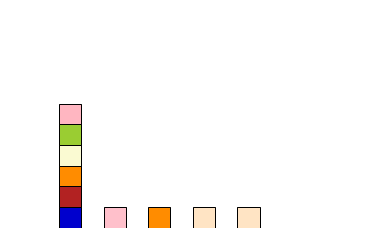

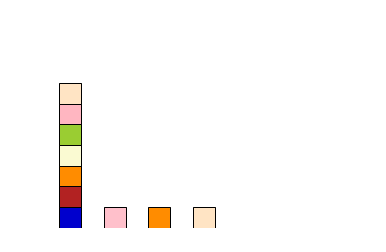

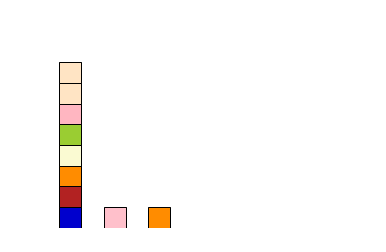

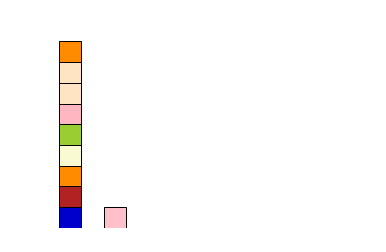

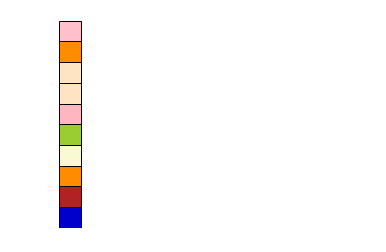

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem8.pddl reward: -10
Parsing domain blocks-domain.pddl
Parsing problem tworules/problem9.pddl


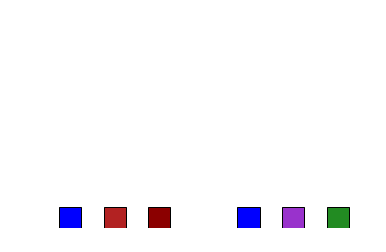

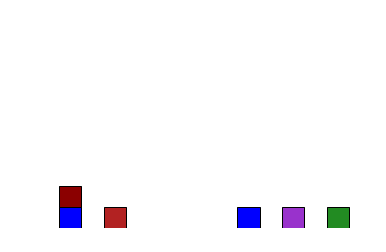

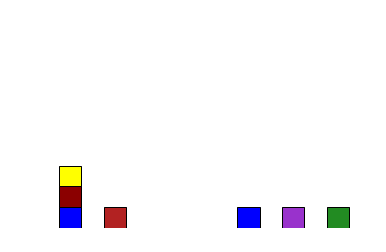

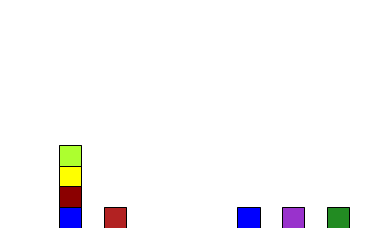

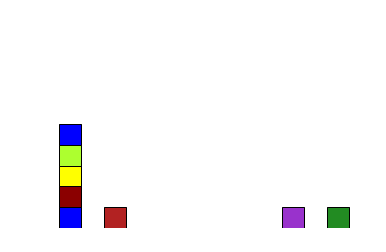

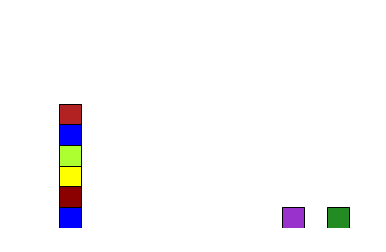

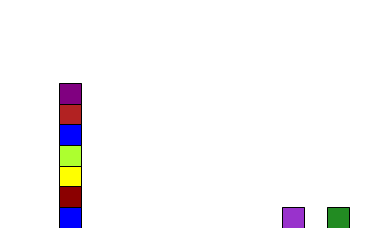

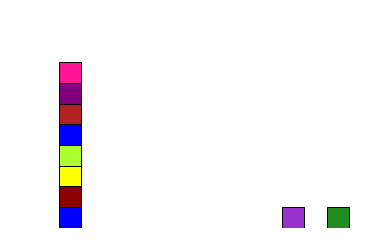

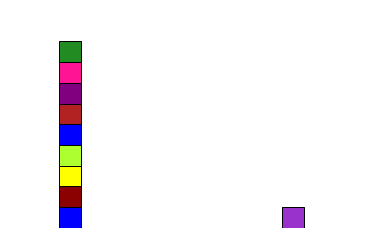

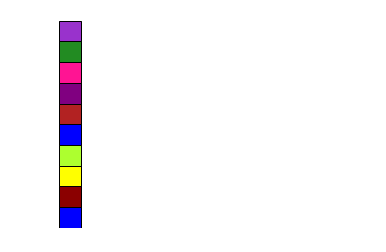

True Label  G=1 G=0
Predict G=1| 10 | 31 |
        G=0| 0 | 1 |
True Label  Y=1 Y=0
Predict Y=1| 2 | 16 |
        Y=0| 1 | 23 |
True Label  R=1 R=0
Predict R=1| 5 | 22 |
        R=0| 0 | 15 |
True Label  B=1 B=0
Predict B=1| 9 | 33 |
        B=0| 0 | 0 |
problem9.pddl reward: -10


'results/tworules/agents.PerfectColoursAgent/0.7/experiment12.out'

In [3]:
run_experiment('tworules_perfect_colour_vis', debug=True)

In [12]:
a = set()
a.add('a')
a

{'a'}